In [6]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [3]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [4]:
os.chdir("/mnt/lanlep2019/")

In [5]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

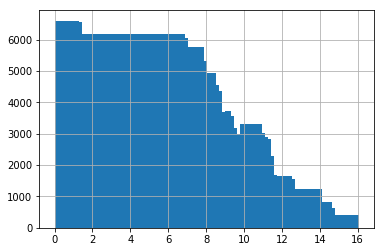

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


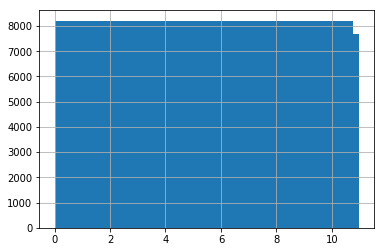

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [27]:
from hyperopt import fmin, tpe, hp


In [28]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    1.081939
quake_06_0120_099000    1.475855
quake_07_0296_013500    0.829115
quake_03_0090_034500    1.081939
quake_08_0137_055500    0.507157
Name: index, dtype: float64

In [29]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [30]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [31]:
best_mae=1e10

In [32]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [33]:
space={
   'num_leaves': hp.uniform('num_leaves', 32,128 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'min_sum_hessian_in_leaf':hp.loguniform('min_sum_hessian_in_leaf', np.log(1e-3),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(1e-3),np.log(0.01) ),
}

In [34]:
def objective(args):
    print args
    return lgbcv(**args)



In [35]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'num_leaves': 52.83573839766703, 'reg_alpha': 1.3330879202325847, 'colsample_bytree': 0.5221140542565675, 'min_sum_hessian_in_leaf': 0.001765399224931045, 'learning_rate': 0.008930484613630362, 'subsample': 0.37461713363648774, 'reg_lambda': 0.43996825123231026, 'min_data_in_leaf': 1290.2899438058419, 'max_depth': 7.759300563898141}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.912302	valid_1's l1: 1.26486  
[200]	training's l1: 0.795316	valid_1's l1: 1.22534  
[300]	training's l1: 0.710449	valid_1's l1: 1.22639  
Early stopping, best iteration is:                   
[233]	training's l1: 0.762896	valid_1's l1: 1.22118
quake    

(1.0389936255512404, 189)                            
valid quake                                          
11                                                   
(381198, 450)                                        
(381198,)                                            
(28196, 450)                                         
(28196,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.929551	valid_1's l1: 1.02759  
[200]	training's l1: 0.815996	valid_1's l1: 1.03163  
Early stopping, best iteration is:                   
[130]	training's l1: 0.882416	valid_1's l1: 1.0262
quake                                                
11                                                   
(1.026196155440658, 130)                             
valid quake                                          
12                                                   
(386834, 450)                                        
(386834,)             

[100]	training's l1: 1.42468	valid_1's l1: 1.18434                          
[200]	training's l1: 1.15675	valid_1's l1: 0.985045                         
[300]	training's l1: 1.07939	valid_1's l1: 0.902411                         
[400]	training's l1: 1.04104	valid_1's l1: 0.872609                         
[500]	training's l1: 1.01786	valid_1's l1: 0.856296                         
[600]	training's l1: 0.99805	valid_1's l1: 0.846181                         
[700]	training's l1: 0.982122	valid_1's l1: 0.841747                        
[800]	training's l1: 0.967006	valid_1's l1: 0.838212                        
[900]	training's l1: 0.946983	valid_1's l1: 0.836591                        
[1000]	training's l1: 0.928626	valid_1's l1: 0.835175                       
[1100]	training's l1: 0.913659	valid_1's l1: 0.834851                       
[1200]	training's l1: 0.898864	valid_1's l1: 0.835406                       
Early stopping, best iteration is:                                          

[500]	training's l1: 1.00115	valid_1's l1: 1.36467                          
[600]	training's l1: 0.98255	valid_1's l1: 1.35268                          
[700]	training's l1: 0.965943	valid_1's l1: 1.34553                         
[800]	training's l1: 0.952067	valid_1's l1: 1.34046                         
[900]	training's l1: 0.935562	valid_1's l1: 1.33763                         
[1000]	training's l1: 0.917286	valid_1's l1: 1.33759                        
Early stopping, best iteration is:                                          
[923]	training's l1: 0.931364	valid_1's l1: 1.33704
quake                                                                       
8                                                                           
(1.33704124329612, 923)                                                     
valid quake                                                                 
9                                                                           
(384759, 450)           

quake                                                                       
13                                                                          
(1.0603378426170043, 812)                                                   
valid quake                                                                 
14                                                                          
(371633, 450)                                                               
(371633,)                                                                   
(37761, 450)                                                                
(37761,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 1.38707	valid_1's l1: 1.68605                          
[200]	training's l1: 1.11404	valid_1's l1: 1.47666                          
[300]	training's l1: 1.0389	valid_1's l1: 1.43375                           

2                                                                           
(1.342147449925469, 1660)                                                   
valid quake                                                                 
3                                                                           
(386763, 450)                                                               
(386763,)                                                                   
(22631, 450)                                                                
(22631,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 2.01067	valid_1's l1: 1.90959                          
[200]	training's l1: 1.4855	valid_1's l1: 1.29391                           
[300]	training's l1: 1.20382	valid_1's l1: 1.11829                          
[400]	training's l1: 1.08102	valid_1's l1: 1.02836                          

[1700]	training's l1: 0.62068	valid_1's l1: 1.40816                         
[1800]	training's l1: 0.605705	valid_1's l1: 1.40608                        
[1900]	training's l1: 0.589924	valid_1's l1: 1.40674                        
Early stopping, best iteration is:                                          
[1800]	training's l1: 0.605705	valid_1's l1: 1.40608
quake                                                                       
6                                                                           
(1.4060821295185115, 1800)                                                  
valid quake                                                                 
7                                                                           
(368154, 450)                                                               
(368154,)                                                                   
(41240, 450)                                                                
(41240,)               

[100]	training's l1: 2.01565	valid_1's l1: 2.01034                          
[200]	training's l1: 1.48813	valid_1's l1: 1.4651                           
[300]	training's l1: 1.2029	valid_1's l1: 1.22089                           
[400]	training's l1: 1.07738	valid_1's l1: 1.12706                          
[500]	training's l1: 0.996959	valid_1's l1: 1.08178                         
[600]	training's l1: 0.936618	valid_1's l1: 1.06062                         
[700]	training's l1: 0.889266	valid_1's l1: 1.04747                         
[800]	training's l1: 0.850951	valid_1's l1: 1.04079                         
[900]	training's l1: 0.817304	valid_1's l1: 1.03607                         
[1000]	training's l1: 0.787529	valid_1's l1: 1.03094                        
[1100]	training's l1: 0.761065	valid_1's l1: 1.02732                        
[1200]	training's l1: 0.736103	valid_1's l1: 1.02552                        
[1300]	training's l1: 0.714483	valid_1's l1: 1.02387                        

(37761, 450)                                                                
(37761,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 1.99665	valid_1's l1: 2.17369                          
[200]	training's l1: 1.45154	valid_1's l1: 1.77824                          
[300]	training's l1: 1.16093	valid_1's l1: 1.58747                          
[400]	training's l1: 1.03484	valid_1's l1: 1.52371                          
[500]	training's l1: 0.959012	valid_1's l1: 1.48863                         
[600]	training's l1: 0.902464	valid_1's l1: 1.46384                         
[700]	training's l1: 0.857567	valid_1's l1: 1.45037                         
[800]	training's l1: 0.820247	valid_1's l1: 1.44374                         
[900]	training's l1: 0.788003	valid_1's l1: 1.44224                         
[1000]	training's l1: 0.757744	valid_1's l1: 1.44026                        

valid quake                                                                  
4                                                                            
(376914, 450)                                                                
(376914,)                                                                    
(32480, 450)                                                                 
(32480,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.15484	valid_1's l1: 1.12281                           
[200]	training's l1: 1.06873	valid_1's l1: 1.08993                           
[300]	training's l1: 1.03747	valid_1's l1: 1.0865                            
[400]	training's l1: 1.01164	valid_1's l1: 1.08498                           
[500]	training's l1: 0.989288	valid_1's l1: 1.08946                          
Early stopping, best iteration is:                              

valid quake                                                                  
10                                                                           
(380166, 450)                                                                
(380166,)                                                                    
(29228, 450)                                                                 
(29228,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.15912	valid_1's l1: 1.06133                           
[200]	training's l1: 1.07241	valid_1's l1: 1.01107                           
[300]	training's l1: 1.04308	valid_1's l1: 0.997617                          
[400]	training's l1: 1.01876	valid_1's l1: 0.991808                          
[500]	training's l1: 0.997136	valid_1's l1: 0.989458                         
Early stopping, best iteration is:                              

(29520,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 0.971426	valid_1's l1: 1.31592                          
[200]	training's l1: 0.836607	valid_1's l1: 1.26237                          
[300]	training's l1: 0.754358	valid_1's l1: 1.24696                          
[400]	training's l1: 0.683704	valid_1's l1: 1.24256                          
[500]	training's l1: 0.631502	valid_1's l1: 1.24083                          
[600]	training's l1: 0.588296	valid_1's l1: 1.23653                          
[700]	training's l1: 0.549794	valid_1's l1: 1.23684                          
Early stopping, best iteration is:                                           
[604]	training's l1: 0.586744	valid_1's l1: 1.23578
quake                                                                        
1                                                                            
(1.235775800

(389202,)                                                                    
(20192, 450)                                                                 
(20192,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 0.984514	valid_1's l1: 1.45412                          
[200]	training's l1: 0.848926	valid_1's l1: 1.37889                          
[300]	training's l1: 0.773015	valid_1's l1: 1.3696                           
Early stopping, best iteration is:                                           
[260]	training's l1: 0.802975	valid_1's l1: 1.36556
quake                                                                        
8                                                                            
(1.3655609845297307, 260)                                                    
valid quake                                                                  
9           

(385215, 450)                                                                
(385215,)                                                                    
(24179, 450)                                                                 
(24179,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 0.98453	valid_1's l1: 1.15333                           
[200]	training's l1: 0.844525	valid_1's l1: 1.12603                          
[300]	training's l1: 0.759646	valid_1's l1: 1.13439                          
Early stopping, best iteration is:                                           
[202]	training's l1: 0.842871	valid_1's l1: 1.12561
quake                                                                        
15                                                                           
(1.1256077294799618, 202)                                                    
mean score  

[1100]	training's l1: 1.02164	valid_1's l1: 1.08098                          
[1200]	training's l1: 1.01372	valid_1's l1: 1.0819                           
Early stopping, best iteration is:                                           
[1155]	training's l1: 1.01716	valid_1's l1: 1.08052
quake                                                                        
4                                                                            
(1.0805237402886634, 1155)                                                   
valid quake                                                                  
5                                                                            
(388820, 450)                                                                
(388820,)                                                                    
(20574, 450)                                                                 
(20574,)                                                                     
Training unt

(1.3359580707135605, 1343)                                                   
valid quake                                                                  
9                                                                            
(384759, 450)                                                                
(384759,)                                                                    
(24635, 450)                                                                 
(24635,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.62727	valid_1's l1: 1.45845                           
[200]	training's l1: 1.25528	valid_1's l1: 1.10403                           
[300]	training's l1: 1.16137	valid_1's l1: 0.999556                          
[400]	training's l1: 1.11889	valid_1's l1: 0.950856                          
[500]	training's l1: 1.09459	valid_1's l1: 0.932761             

(21885, 450)                                                                 
(21885,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.68351	valid_1's l1: 1.60244                           
[200]	training's l1: 1.25657	valid_1's l1: 1.31242                           
[300]	training's l1: 1.15832	valid_1's l1: 1.21471                           
[400]	training's l1: 1.11111	valid_1's l1: 1.15031                           
[500]	training's l1: 1.08545	valid_1's l1: 1.11806                           
[600]	training's l1: 1.06945	valid_1's l1: 1.09899                           
[700]	training's l1: 1.05783	valid_1's l1: 1.08647                           
[800]	training's l1: 1.04783	valid_1's l1: 1.07705                           
[900]	training's l1: 1.03921	valid_1's l1: 1.07023                           
[1000]	training's l1: 1.03139	valid_1's l1: 1.0659              

(22631,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.27132	valid_1's l1: 1.179                             
[200]	training's l1: 0.954574	valid_1's l1: 0.972812                         
[300]	training's l1: 0.829971	valid_1's l1: 0.900403                         
[400]	training's l1: 0.744675	valid_1's l1: 0.879878                         
[500]	training's l1: 0.690443	valid_1's l1: 0.866708                         
[600]	training's l1: 0.64522	valid_1's l1: 0.86285                           
[700]	training's l1: 0.604174	valid_1's l1: 0.860783                         
[800]	training's l1: 0.562405	valid_1's l1: 0.861242                         
Early stopping, best iteration is:                                           
[727]	training's l1: 0.593822	valid_1's l1: 0.859597
quake                                                                        
3          

[800]	training's l1: 0.559033	valid_1's l1: 1.34718                            
[900]	training's l1: 0.523415	valid_1's l1: 1.34783                            
Early stopping, best iteration is:                                             
[825]	training's l1: 0.54921	valid_1's l1: 1.34595
quake                                                                          
8                                                                              
(1.3459526245174134, 825)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                             

valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.23348	valid_1's l1: 1.6464                              
[200]	training's l1: 0.915587	valid_1's l1: 1.48374                            
[300]	training's l1: 0.79134	valid_1's l1: 1.44766                             
[400]	training's l1: 0.709179	valid_1's l1: 1.4415                             
[500]	training's l1: 0.653484	valid_1's l1: 1.43954                            
[600]	training's l1: 0.604461	valid_1's 

Early stopping, best iteration is:                                             
[246]	training's l1: 1.01744	valid_1's l1: 1.07749
quake                                                                          
4                                                                              
(1.0774921920685823, 246)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13	valid_1's l1: 1.39015                      

(1.010469370685397, 402)                                                       
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.14504	valid_1's l1: 1.02633                             
[200]	training's l1: 1.04086	valid_1's l1: 0.995281                            
Early stopping, best iteration is:                                             
[165]	training's l1: 1.0624	valid_1's l1: 0.992931
quake                                                                

[900]	training's l1: 0.933854	valid_1's l1: 1.23336                            
[1000]	training's l1: 0.918171	valid_1's l1: 1.22656                           
[1100]	training's l1: 0.904388	valid_1's l1: 1.22299                           
[1200]	training's l1: 0.891731	valid_1's l1: 1.22008                           
[1300]	training's l1: 0.880643	valid_1's l1: 1.21786                           
[1400]	training's l1: 0.868976	valid_1's l1: 1.21677                           
[1500]	training's l1: 0.854416	valid_1's l1: 1.21498                           
[1600]	training's l1: 0.839557	valid_1's l1: 1.21465                           
[1700]	training's l1: 0.826335	valid_1's l1: 1.21376                           
[1800]	training's l1: 0.812646	valid_1's l1: 1.21318                           
Early stopping, best iteration is:                                             
[1766]	training's l1: 0.817463	valid_1's l1: 1.21312
quake                                                              

[500]	training's l1: 1.04329	valid_1's l1: 1.36327                             
[600]	training's l1: 1.00777	valid_1's l1: 1.33944                             
[700]	training's l1: 0.98261	valid_1's l1: 1.32438                             
[800]	training's l1: 0.962057	valid_1's l1: 1.31411                            
[900]	training's l1: 0.944745	valid_1's l1: 1.30699                            
[1000]	training's l1: 0.93011	valid_1's l1: 1.30163                            
[1100]	training's l1: 0.916449	valid_1's l1: 1.29796                           
[1200]	training's l1: 0.903363	valid_1's l1: 1.29502                           
[1300]	training's l1: 0.89184	valid_1's l1: 1.29318                            
[1400]	training's l1: 0.881268	valid_1's l1: 1.29276                           
[1500]	training's l1: 0.868921	valid_1's l1: 1.29366                           
Early stopping, best iteration is:                                             
[1428]	training's l1: 0.878499	valid_1's

(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.87235	valid_1's l1: 1.72901                             
[200]	training's l1: 1.34925	valid_1's l1: 1.24443                             
[300]	training's l1: 1.17885	valid_1's l1: 1.08534                             
[400]	training's l1: 1.09849	valid_1's l1: 1.00859                             
[500]	training's l1: 1.04809	valid_1's l1: 0.963718                            
[600]	training's l1: 1.01401	valid_1's l1: 0.941675                            
[700]	training's l1: 0.988483	valid_1's l1: 0.929675                           
[800]	training's l1: 0.968724	valid_1's 

12                                                                             
(0.9478957742763049, 1699)                                                     
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.93043	valid_1's l1: 1.79448                             
[200]	training's l1: 1.38833	valid_1's l1: 1.44963                             
[300]	training's l1: 1.18761	valid_1's l1: 1.28912                             
[400]	training's l1: 1.10215	valid_1's l

[200]	training's l1: 1.00821	valid_1's l1: 1.38306                             
[300]	training's l1: 0.942639	valid_1's l1: 1.35782                            
[400]	training's l1: 0.899805	valid_1's l1: 1.34819                            
[500]	training's l1: 0.867109	valid_1's l1: 1.34833                            
[600]	training's l1: 0.831329	valid_1's l1: 1.34609                            
Early stopping, best iteration is:                                             
[535]	training's l1: 0.854592	valid_1's l1: 1.34517
quake                                                                          
2                                                                              
(1.3451738539259686, 535)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                       

[300]	training's l1: 0.947735	valid_1's l1: 1.37019                            
[400]	training's l1: 0.907365	valid_1's l1: 1.35288                            
[500]	training's l1: 0.87149	valid_1's l1: 1.34532                             
[600]	training's l1: 0.837486	valid_1's l1: 1.34                               
Early stopping, best iteration is:                                             
[593]	training's l1: 0.839715	valid_1's l1: 1.33946
quake                                                                          
8                                                                              
(1.3394624148773482, 593)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                           

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.16459	valid_1's l1: 1.54033                             
[200]	training's l1: 0.988051	valid_1's l1: 1.43913                            
[300]	training's l1: 0.919431	valid_1's l1: 1.43304                            
[400]	training's l1: 0.878203	valid_1's l1: 1.43202                            
[500]	training's l1: 0.842605	valid_1's l1: 1.43177                            
Early stopping, best iteration is:                                             
[435]	training's l1: 0.864867	valid_1's l1: 1.42977
quake                                                                          
14                                                                             
(1.4297747915483905, 435)                                                      
valid quake                                                                    
15                                                                  

2                                                                               
(1.3497299272349959, 1749)                                                      
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.99048	valid_1's l1: 1.88547                              
[200]	training's l1: 1.45942	valid_1's l1: 1.26746                              
[300]	training's l1: 1.18596	valid_1's l1: 1.12146                              
[400]	training's l1: 1.06377

[1500]	training's l1: 0.619562	valid_1's l1: 1.43025                            
[1600]	training's l1: 0.600907	valid_1's l1: 1.42939                            
[1700]	training's l1: 0.584361	valid_1's l1: 1.4276                             
[1800]	training's l1: 0.567379	valid_1's l1: 1.42667                            
[1900]	training's l1: 0.55204	valid_1's l1: 1.42658                             
[2000]	training's l1: 0.537321	valid_1's l1: 1.42497                            
[2100]	training's l1: 0.523557	valid_1's l1: 1.42386                            
[2200]	training's l1: 0.510704	valid_1's l1: 1.42375                            
[2300]	training's l1: 0.498451	valid_1's l1: 1.42285                            
[2400]	training's l1: 0.487257	valid_1's l1: 1.42185                            
[2500]	training's l1: 0.476437	valid_1's l1: 1.42041                            
[2600]	training's l1: 0.466448	valid_1's l1: 1.42039                            
[2700]	training's l1: 0.4566

[1200]	training's l1: 0.705675	valid_1's l1: 0.941049                           
[1300]	training's l1: 0.682122	valid_1's l1: 0.9411                             
[1400]	training's l1: 0.661498	valid_1's l1: 0.939443                           
[1500]	training's l1: 0.641199	valid_1's l1: 0.937829                           
[1600]	training's l1: 0.621745	valid_1's l1: 0.936771                           
[1700]	training's l1: 0.603883	valid_1's l1: 0.936464                           
[1800]	training's l1: 0.586921	valid_1's l1: 0.936297                           
[1900]	training's l1: 0.570119	valid_1's l1: 0.935931                           
[2000]	training's l1: 0.553998	valid_1's l1: 0.934947                           
[2100]	training's l1: 0.539626	valid_1's l1: 0.934114                           
[2200]	training's l1: 0.52597	valid_1's l1: 0.934108                            
Early stopping, best iteration is:                                              
[2181]	training's l1: 0.5283

[100]	training's l1: 2.00384	valid_1's l1: 1.89077                              
[200]	training's l1: 1.45719	valid_1's l1: 1.53307                              
[300]	training's l1: 1.17995	valid_1's l1: 1.33129                              
[400]	training's l1: 1.05488	valid_1's l1: 1.24527                              
[500]	training's l1: 0.975786	valid_1's l1: 1.19004                             
[600]	training's l1: 0.917528	valid_1's l1: 1.15056                             
[700]	training's l1: 0.872084	valid_1's l1: 1.12112                             
[800]	training's l1: 0.833743	valid_1's l1: 1.10228                             
[900]	training's l1: 0.800337	valid_1's l1: 1.08928                             
[1000]	training's l1: 0.769441	valid_1's l1: 1.08007                            
[1100]	training's l1: 0.74119	valid_1's l1: 1.07399                             
[1200]	training's l1: 0.716373	valid_1's l1: 1.07141                            
[1300]	training's l1: 0.6939

(1.2022195596277094, 927)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.18969	valid_1's l1: 1.52547                              
[200]	training's l1: 0.939175	valid_1's l1: 1.39129                             
[300]	training's l1: 0.831271	valid_1's l1: 1.36429                             
[400]	training's l1: 0.758366	valid_1's l1: 1.34963                             
[500]	training's l1: 0.69831

Early stopping, best iteration is:                                              
[589]	training's l1: 0.64348	valid_1's l1: 1.37181
quake                                                                           
7                                                                               
(1.3718071595682242, 589)                                                       
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.18985	valid_1's l1: 1.52414        

(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.19974	valid_1's l1: 1.33184                              
[200]	training's l1: 0.952569	valid_1's l1: 1.14783                             
[300]	training's l1: 0.844989	valid_1's l1: 1.09146                             
[400]	training's l1: 0.768655	valid_1's l1: 1.07188                             
[500]	training's l1: 0.709938	valid_1's l1: 1.06855                             
[600]	training's l1: 0.665412	valid_1's l1: 1.06255                             
[700]	training's l1: 0.623451	valid_1's l1: 1.06204                             
Early stopping, best iteration is:                                              
[661]	training's l1: 0.63820

[100]	training's l1: 0.974846	valid_1's l1: 0.906698                            
[200]	training's l1: 0.83456	valid_1's l1: 0.854702                             
[300]	training's l1: 0.764281	valid_1's l1: 0.854152                            
Early stopping, best iteration is:                                              
[263]	training's l1: 0.791386	valid_1's l1: 0.850177
quake                                                                           
3                                                                               
(0.8501766601625321, 263)                                                       
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                            

(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.970211	valid_1's l1: 1.05141                             
[200]	training's l1: 0.830473	valid_1's l1: 1.03167                             
[300]	training's l1: 0.753806	valid_1's l1: 1.02847                             
Early stopping, best iteration is:                                              
[260]	training's l1: 0.786247	valid_1's l1: 1.02748
quake                                                                           
10                                                                              
(1.027477407053608, 260)                                                        
valid quake                                                                     
11                                                       

quake                                                                           
1                                                                               
(1.229151671851443, 388)                                                        
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.12887	valid_1's l1: 1.46045                              
[200]	training's l1: 0.976217	valid_1's l1: 1.36529                             
[300]	training's l1: 0.91972

valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.13071	valid_1's l1: 1.50335                              
[200]	training's l1: 0.983681	valid_1's l1: 1.39419                             
[300]	training's l1: 0.926736	valid_1's l1: 1.35874                             
[400]	training's l1: 0.888413	valid_1's l1: 1.3435                              
[500]	training's l1: 0.849263	valid_1's l1: 1.34485                             
Early stopping, best iterati

14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.10434	valid_1's l1: 1.50986                              
[200]	training's l1: 0.956843	valid_1's l1: 1.44029                             
[300]	training's l1: 0.898406	valid_1's l1: 1.43505                             
Early stopping, best iteration is:                                              
[279]	training's l1: 0.908033	valid_1's l1: 1.43492
quake                                                                           
14                                                       

(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.979959	valid_1's l1: 1.40253                             
[200]	training's l1: 0.805471	valid_1's l1: 1.33233                             
[300]	training's l1: 0.725203	valid_1's l1: 1.32057                             
[400]	training's l1: 0.661378	valid_1's l1: 1.32043                             
Early stopping, best iteration is:                                              
[319]	training's l1: 0.712134	valid_1's l1: 1.31884
quake                                                                           
5                                                                               
(1.3188437846556893, 319)                                

quake                                                                           
11                                                                              
(1.0309943823043042, 212)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.97348	valid_1's l1: 1.07455                              
[200]	training's l1: 0.806614	valid_1's l1: 0.991079                            
[300]	training's l1: 0.72035

(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.69707	valid_1's l1: 1.92653                              
[200]	training's l1: 1.24019	valid_1's l1: 1.49387                              
[300]	training's l1: 1.12779	valid_1's l1: 1.39987                              
[400]	training's l1: 1.0703	valid_1's l1: 1.36354                               
[500]	training's l1: 1.03853	valid_1's l1: 1.34895                              
[600]	training's l1: 1.01645	valid_1's l1: 1.33921                              
[700]	training's l1: 1.00171	valid_1's l1: 1.33123                              
[800]	training's l1: 0.987714	valid_1's l1: 1.32577                             
[900]	training's l1: 0.975567	valid_1's l1: 1.32377                             
[1000]	training's l1: 0.964698	valid_1's l1: 1.32308                            
Early stopping, best iterati

[800]	training's l1: 0.979077	valid_1's l1: 1.3856                              
[900]	training's l1: 0.967231	valid_1's l1: 1.37996                             
[1000]	training's l1: 0.956538	valid_1's l1: 1.37728                            
[1100]	training's l1: 0.943788	valid_1's l1: 1.38109                            
Early stopping, best iteration is:                                              
[1043]	training's l1: 0.952174	valid_1's l1: 1.37603
quake                                                                           
6                                                                               
(1.376030532472383, 1043)                                                       
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                               

10                                                                              
(1.0014998551171934, 1078)                                                      
valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.71024	valid_1's l1: 1.66973                              
[200]	training's l1: 1.26461	valid_1's l1: 1.16644                              
[300]	training's l1: 1.1514	valid_1's l1: 1.04346                               
[400]	training's l1: 1.09216

[400]	training's l1: 1.07748	valid_1's l1: 1.14488                              
[500]	training's l1: 1.04508	valid_1's l1: 1.14055                              
[600]	training's l1: 1.02383	valid_1's l1: 1.13929                              
[700]	training's l1: 1.00796	valid_1's l1: 1.13222                              
[800]	training's l1: 0.994292	valid_1's l1: 1.13088                             
Early stopping, best iteration is:                                              
[792]	training's l1: 0.9953	valid_1's l1: 1.12386
quake                                                                           
15                                                                              
(1.12385664029618, 792)                                                         
mean score                                                                      
1.15104144171622                                                                
{'num_leaves': 110.11108472652953, 'reg_alpha': 0.011031385

(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.475	valid_1's l1: 1.63014                                
[200]	training's l1: 1.12982	valid_1's l1: 1.43544                              
[300]	training's l1: 1.03047	valid_1's l1: 1.36532                              
[400]	training's l1: 0.98017	valid_1's l1: 1.33233                              
[500]	training's l1: 0.946605	valid_1's l1: 1.31702                             
[600]	training's l1: 0.919009	valid_1's l1: 1.30907                             
[700]	training's l1: 0.896175	valid_1's l1: 1.30396                             
[800]	training's l1: 0.875596	valid_1's l1: 1.30475                             
Early stopping, best iteration is:                                              
[727]	training's l1: 0.890798	valid_1's l1: 1.30272
quake                                                    

(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.48048	valid_1's l1: 1.4311                               
[200]	training's l1: 1.13954	valid_1's l1: 1.09697                              
[300]	training's l1: 1.03508	valid_1's l1: 1.03964                              
[400]	training's l1: 0.981484	valid_1's l1: 1.02002                             
[500]	training's l1: 0.948573	valid_1's l1: 1.01262                             
[600]	training's l1: 0.920829	valid_1's l1: 1.00888                             
[700]	training's l1: 0.898639	valid_1's l1: 1.00578                             
[800]	training's l1: 0.87519

(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.43948	valid_1's l1: 1.30929                              
[200]	training's l1: 1.12475	valid_1's l1: 1.19376                              
[300]	training's l1: 1.0248	valid_1's l1: 1.1635                                
[400]	training's l1: 0.973528	valid_1's l1: 1.15149                             
[500]	training's l1: 0.939301	valid_1's l1: 1.15155                             
Early stopping, best iteration is:                                              
[463]	training's l1: 0.950421	valid_1's l1: 1.14637
quake                                                                           
15                                                                              
(1.146369458846072, 463)                                                        
mean score                                               

valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.738656	valid_1's l1: 1.38289                             
[200]	training's l1: 0.544335	valid_1's l1: 1.37384                             
Early stopping, best iteration is:                                              
[149]	training's l1: 0.623086	valid_1's l1: 1.36813
quake                                                                           
7                                                        

(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.733571	valid_1's l1: 1.46791                             
[200]	training's l1: 0.542101	valid_1's l1: 1.47556                             
Early stopping, best iteration is:                                              
[144]	training's l1: 0.633416	valid_1's l1: 1.46505
quake                                                                           
14                                                                              
(1.4650532598940575, 144)                                                       
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                

(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.05825	valid_1's l1: 1.41532                              
[200]	training's l1: 0.862368	valid_1's l1: 1.3151                              
[300]	training's l1: 0.769966	valid_1's l1: 1.29568                             
[400]	training's l1: 0.709631	valid_1's l1: 1.29235                             
Early stopping, best iteration is:                                              
[366]	training's l1: 0.728657	valid_1's l1: 1.28953
quake                                                                           
5                                                                               
(1.2895273277476778, 366)                                                       
valid quake                                                                     
6                                                        

(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.07374	valid_1's l1: 1.10917                              
[200]	training's l1: 0.867602	valid_1's l1: 1.03081                             
[300]	training's l1: 0.771966	valid_1's l1: 1.03131                             
Early stopping, best iteration is:                                              
[241]	training's l1: 0.821958	valid_1's l1: 1.02801
quake                                                                           
11                                                                              
(1.028011549736587, 241)                                                        
valid quake                                                                     
12                                                       

1                                                                               
(1.2157038945604965, 1046)                                                      
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.76518	valid_1's l1: 1.98567                              
[200]	training's l1: 1.27365	valid_1's l1: 1.52318                              
[300]	training's l1: 1.14957	valid_1's l1: 1.41675                              
[400]	training's l1: 1.08734

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.71379	valid_1's l1: 1.8095                               
[200]	training's l1: 1.25626	valid_1's l1: 1.51633                              
[300]	training's l1: 1.13638	valid_1's l1: 1.44929                              
[400]	training's l1: 1.07542	valid_1's l1: 1.42148                              
[500]	training's l1: 1.04098	valid_1's l1: 1.40875                              
[600]	training's l1: 1.01842	valid_1's l1: 1.40087                              
[700]	training's l1: 1.00272	valid_1's l1: 1.39333                              
[800]	training's l1: 0.99022	valid_1's l1: 1.3879                               
[900]	training's l1: 0.978139	valid_1's l1: 1.38444                             
[1000]	training's l1: 0.967999	valid_1's l1: 1.37981                            
[1100]	training's l1: 0.958712	valid_1's l1: 1.37701                            
[1200]	training's l1: 0.9470

(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.77039	valid_1's l1: 1.73507                              
[200]	training's l1: 1.29102	valid_1's l1: 1.21221                              
[300]	training's l1: 1.16671	valid_1's l1: 1.08555                              
[400]	training's l1: 1.10295	valid_1's l1: 1.04613                              
[500]	training's l1: 1.06683	valid_1's l1: 1.02896                              
[600]	training's l1: 1.04263	valid_1's l1: 1.01942                              
[700]	training's l1: 1.02753	valid_1's l1: 1.01195                              
[800]	training's l1: 1.01474	valid_1's l1: 1.00698                              
[900]	training's l1: 1.0021	valid_1's l1: 1.00239                               
[1000]	training's l1: 0.991867	valid_1's l1: 0.998947                           
[1100]	training's l1: 0.9813

[700]	training's l1: 0.992987	valid_1's l1: 1.42721                             
[800]	training's l1: 0.979202	valid_1's l1: 1.4256                              
Early stopping, best iteration is:                                              
[786]	training's l1: 0.981134	valid_1's l1: 1.42505
quake                                                                           
14                                                                              
(1.4250453110968329, 786)                                                       
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                 

(0.8440667810964145, 1227)                                                      
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.72463	valid_1's l1: 1.73888                              
[200]	training's l1: 1.28411	valid_1's l1: 1.2556                               
[300]	training's l1: 1.17512	valid_1's l1: 1.13853                              
[400]	training's l1: 1.12267	valid_1's l1: 1.10289                              
[500]	training's l1: 1.09388

valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.73283	valid_1's l1: 1.82779                              
[200]	training's l1: 1.27083	valid_1's l1: 1.54395                              
[300]	training's l1: 1.16523	valid_1's l1: 1.49323                              
[400]	training's l1: 1.11363	valid_1's l1: 1.43825                              
[500]	training's l1: 1.08586	valid_1's l1: 1.40632                              
[600]	training's l1: 1.06846

quake                                                                           
11                                                                              
(0.9841171992082476, 1141)                                                      
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.67959	valid_1's l1: 1.5258                               
[200]	training's l1: 1.27369	valid_1's l1: 1.16116                              
[300]	training's l1: 1.17394

(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.09573	valid_1's l1: 1.27428                              
[200]	training's l1: 1.03296	valid_1's l1: 1.22617                              
[300]	training's l1: 1.00068	valid_1's l1: 1.22162                              
[400]	training's l1: 0.971129	valid_1's l1: 1.2206                              
[500]	training's l1: 0.947175	valid_1's l1: 1.21836                             
Early stopping, best iteration is:                                              
[458]	training's l1: 0.956798	valid_1's l1: 1.21672
quake                                                    

[400]	training's l1: 0.965171	valid_1's l1: 1.34053                             
[500]	training's l1: 0.943087	valid_1's l1: 1.33991                             
[600]	training's l1: 0.923258	valid_1's l1: 1.34283                             
Early stopping, best iteration is:                                              
[508]	training's l1: 0.941456	valid_1's l1: 1.33901
quake                                                                           
7                                                                               
(1.3390089502717322, 508)                                                       
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                             

13                                                                              
(1.0630307980117546, 363)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.08461	valid_1's l1: 1.43029                              
[200]	training's l1: 1.01809	valid_1's l1: 1.41767                              
[300]	training's l1: 0.982666	valid_1's l1: 1.42065                             
Early stopping, best iterati

[600]	training's l1: 1.11466	valid_1's l1: 0.900675                            
[700]	training's l1: 1.0975	valid_1's l1: 0.886758                             
[800]	training's l1: 1.08537	valid_1's l1: 0.876526                            
[900]	training's l1: 1.07632	valid_1's l1: 0.867896                            
[1000]	training's l1: 1.06871	valid_1's l1: 0.85994                            
[1100]	training's l1: 1.0619	valid_1's l1: 0.853587                            
[1200]	training's l1: 1.05548	valid_1's l1: 0.849392                           
[1300]	training's l1: 1.04965	valid_1's l1: 0.845998                           
[1400]	training's l1: 1.04409	valid_1's l1: 0.843309                           
[1500]	training's l1: 1.03857	valid_1's l1: 0.840209                           
[1600]	training's l1: 1.03296	valid_1's l1: 0.84054                            
Early stopping, best iteration is:                                             
[1534]	training's l1: 1.03671	valid_1's 

(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.91467	valid_1's l1: 2.17538                             
[200]	training's l1: 1.40352	valid_1's l1: 1.74586                             
[300]	training's l1: 1.22805	valid_1's l1: 1.54287                             
[400]	training's l1: 1.15514	valid_1's l1: 1.45829                             
[500]	training's l1: 1.11251	valid_1's l1: 1.41638                             
[600]	training's l1: 1.08514	valid_1's l1: 1.39372                             
[700]	training's l1: 1.06696	valid_1's l1: 1.38254                             
[800]	training's l1: 1.05419	valid_1's l

[1000]	training's l1: 1.06002	valid_1's l1: 1.00747                            
[1100]	training's l1: 1.05283	valid_1's l1: 1.00446                            
[1200]	training's l1: 1.04633	valid_1's l1: 1.00143                            
[1300]	training's l1: 1.0401	valid_1's l1: 0.997694                            
[1400]	training's l1: 1.03409	valid_1's l1: 0.99478                            
[1500]	training's l1: 1.02715	valid_1's l1: 0.993185                           
[1600]	training's l1: 1.02158	valid_1's l1: 0.992898                           
[1700]	training's l1: 1.01594	valid_1's l1: 0.992606                           
[1800]	training's l1: 1.01022	valid_1's l1: 0.992619                           
Early stopping, best iteration is:                                             
[1722]	training's l1: 1.01463	valid_1's l1: 0.992432
quake                                                                          
10                                                                 

(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.91011	valid_1's l1: 2.07717                             
[200]	training's l1: 1.38527	valid_1's l1: 1.67107                             
[300]	training's l1: 1.20433	valid_1's l1: 1.51634                             
[400]	training's l1: 1.13688	valid_1's l1: 1.46621                             
[500]	training's l1: 1.09729	valid_1's l1: 1.44009                             
[600]	training's l1: 1.07233	valid_1's l1: 1.42814                             
[700]	training's l1: 1.05466	valid_1's l1: 1.42187                             
[800]	training's l1: 1.04179	valid_1's l

[300]	training's l1: 1.15559	valid_1's l1: 0.948615                            
[400]	training's l1: 1.11355	valid_1's l1: 0.90105                             
[500]	training's l1: 1.08969	valid_1's l1: 0.880429                            
[600]	training's l1: 1.07517	valid_1's l1: 0.867531                            
[700]	training's l1: 1.06397	valid_1's l1: 0.857269                            
[800]	training's l1: 1.05417	valid_1's l1: 0.8491                              
[900]	training's l1: 1.04511	valid_1's l1: 0.842779                            
[1000]	training's l1: 1.03687	valid_1's l1: 0.841508                           
[1100]	training's l1: 1.028	valid_1's l1: 0.840599                             
[1200]	training's l1: 1.01986	valid_1's l1: 0.839666                           
[1300]	training's l1: 1.01144	valid_1's l1: 0.837919                           
Early stopping, best iteration is:                                             
[1291]	training's l1: 1.01211	valid_1's 

[1200]	training's l1: 0.985721	valid_1's l1: 1.34877                           
[1300]	training's l1: 0.977863	valid_1's l1: 1.34799                           
[1400]	training's l1: 0.970159	valid_1's l1: 1.34687                           
[1500]	training's l1: 0.962605	valid_1's l1: 1.34711                           
Early stopping, best iteration is:                                             
[1441]	training's l1: 0.966916	valid_1's l1: 1.34647
quake                                                                          
7                                                                              
(1.3464679614756516, 1441)                                                     
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                          

Early stopping, best iteration is:                                             
[929]	training's l1: 1.03319	valid_1's l1: 0.986988
quake                                                                          
11                                                                             
(0.9869879579036437, 929)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.57212	valid_1's l1: 1.41254                  

(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.28143	valid_1's l1: 1.41635                             
[200]	training's l1: 1.11251	valid_1's l1: 1.29303                             
[300]	training's l1: 1.06403	valid_1's l1: 1.25093                             
[400]	training's l1: 1.04107	valid_1's l1: 1.22957                             
[500]	training's l1: 1.02236	valid_1's l1: 1.22113                             
[600]	training's l1: 1.00608	valid_1's l1: 1.21863                             
Early stopping, best iteration is:                                             
[581]	training's l1: 1.00903	valid_1's l1: 1.21746
quake                                                                          
1                                                                              
(1.2174593448825397, 581)                                            

[600]	training's l1: 1.00176	valid_1's l1: 1.39103                             
[700]	training's l1: 0.987062	valid_1's l1: 1.38865                            
[800]	training's l1: 0.973197	valid_1's l1: 1.38788                            
Early stopping, best iteration is:                                             
[749]	training's l1: 0.98024	valid_1's l1: 1.38723
quake                                                                          
6                                                                              
(1.3872315696545399, 749)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                         

Early stopping, best iteration is:                                             
[608]	training's l1: 1.02688	valid_1's l1: 0.986923
quake                                                                          
11                                                                             
(0.9869226647361992, 608)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.2963	valid_1's l1: 1.179                     

(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08855	valid_1's l1: 1.33951                             
[200]	training's l1: 1.02661	valid_1's l1: 1.3083                              
[300]	training's l1: 0.991569	valid_1's l1: 1.30972                            
Early stopping, best iteration is:                                             
[224]	training's l1: 1.01711	valid_1's l1: 1.30498
quake                                                                          
2                                                                              
(1.3049756573438005, 224)                                                      
valid quake                                                          

quake                                                                          
8                                                                              
(1.3442407032049561, 270)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10983	valid_1's l1: 0.949263                            
[200]	training's l1: 1.05034	valid_1's l1: 0.930593                            
[300]	training's l1: 1.01545	valid_1's l

quake                                                                          
15                                                                             
(1.1379075086912176, 92)                                                       
mean score                                                                     
1.147831858821027                                                              
{'num_leaves': 78.54476363239482, 'reg_alpha': 0.4547230514545857, 'colsample_bytree': 0.789991231506571, 'min_sum_hessian_in_leaf': 0.008886442868224893, 'learning_rate': 0.0020688626915798185, 'subsample': 0.8031332311718844, 'reg_lambda': 4.2083065039810545, 'min_data_in_leaf': 27.055609462920046, 'max_depth': 4.093013315046173}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                 

[100]	training's l1: 1.54966	valid_1's l1: 1.64942                             
[200]	training's l1: 1.18532	valid_1's l1: 1.43825                             
[300]	training's l1: 1.09287	valid_1's l1: 1.36277                             
[400]	training's l1: 1.04718	valid_1's l1: 1.32401                             
[500]	training's l1: 1.02017	valid_1's l1: 1.30797                             
[600]	training's l1: 1.00181	valid_1's l1: 1.30098                             
[700]	training's l1: 0.984622	valid_1's l1: 1.29142                            
[800]	training's l1: 0.970349	valid_1's l1: 1.28773                            
[900]	training's l1: 0.957855	valid_1's l1: 1.2846                             
[1000]	training's l1: 0.945356	valid_1's l1: 1.28324                           
[1100]	training's l1: 0.929303	valid_1's l1: 1.28181                           
[1200]	training's l1: 0.915415	valid_1's l1: 1.2818                            
Early stopping, best iteration is:      

[1200]	training's l1: 0.92213	valid_1's l1: 0.906801                           
[1300]	training's l1: 0.908901	valid_1's l1: 0.906189                          
[1400]	training's l1: 0.896477	valid_1's l1: 0.906586                          
Early stopping, best iteration is:                                             
[1325]	training's l1: 0.905765	valid_1's l1: 0.905693
quake                                                                          
9                                                                              
(0.9056926134125182, 1325)                                                     
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                      

[500]	training's l1: 0.993637	valid_1's l1: 1.42306                            
[600]	training's l1: 0.973826	valid_1's l1: 1.42097                            
Early stopping, best iteration is:                                             
[575]	training's l1: 0.978556	valid_1's l1: 1.42034
quake                                                                          
14                                                                             
(1.4203442030170776, 575)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                            

5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13689	valid_1's l1: 1.4689                              
[200]	training's l1: 0.956452	valid_1's l1: 1.35633                            
[300]	training's l1: 0.883639	valid_1's l1: 1.32774                            
[400]	training's l1: 0.835084	valid_1's l1: 1.32104                            
Early stopping, best iteration is:                                             
[391]	training's l1: 0.839421	valid_1's l1: 1.31928
quake                                                               

(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15278	valid_1's l1: 1.13567                             
[200]	training's l1: 0.967948	valid_1's l1: 1.03145                            
[300]	training's l1: 0.893459	valid_1's l1: 1.027                              
Early stopping, best iteration is:                                             
[286]	training's l1: 0.901901	valid_1's l1: 1.02653
quake                                                                          
11                                                                             
(1.0265267272955867, 286)                                           

[300]	training's l1: 0.870657	valid_1's l1: 1.25468                            
[400]	training's l1: 0.799702	valid_1's l1: 1.23176                            
[500]	training's l1: 0.745492	valid_1's l1: 1.22273                            
[600]	training's l1: 0.701595	valid_1's l1: 1.21626                            
[700]	training's l1: 0.663859	valid_1's l1: 1.20848                            
[800]	training's l1: 0.626313	valid_1's l1: 1.20274                            
[900]	training's l1: 0.593853	valid_1's l1: 1.20031                            
[1000]	training's l1: 0.566528	valid_1's l1: 1.19897                           
[1100]	training's l1: 0.54201	valid_1's l1: 1.19908                            
[1200]	training's l1: 0.519806	valid_1's l1: 1.19873                           
[1300]	training's l1: 0.500358	valid_1's l1: 1.19816                           
Early stopping, best iteration is:                                             
[1261]	training's l1: 0.508036	valid_1's

quake                                                                          
6                                                                              
(1.4034891344203175, 687)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.25687	valid_1's l1: 1.68681                             
[200]	training's l1: 0.978646	valid_1's l1: 1.43763                            
[300]	training's l1: 0.865623	valid_1's 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.23895	valid_1's l1: 1.20504                             
[200]	training's l1: 0.985827	valid_1's l1: 1.05141                            
[300]	training's l1: 0.880998	valid_1's l1: 0.998592                           
[400]	training's l1: 0.81122	valid_1's l1: 0.976072                            
[500]	training's l1: 0.756572	valid_1's l1: 0.963923                           
[600]	training's l1: 0.713205	valid_1's l1: 0.957146                           
[700]	training's l1: 0.67285	valid_1's l1: 0.95454                             
[800]	training's l1: 0.636373	valid_1's l1: 0.954303                           
[900]	training's l1: 0.605562	valid_1's l1: 0.954082                           
[1000]	training's l1: 0.578243	valid_1's l1: 0.952664                          
[1100]	training's l1: 0.554061	valid_1's l1: 0.952457                          
Early stopping, best iteration is:      

[1600]	training's l1: 0.712016	valid_1's l1: 1.21741                           
[1700]	training's l1: 0.69753	valid_1's l1: 1.21498                            
[1800]	training's l1: 0.684068	valid_1's l1: 1.21356                           
[1900]	training's l1: 0.671446	valid_1's l1: 1.21149                           
[2000]	training's l1: 0.659522	valid_1's l1: 1.2117                            
Early stopping, best iteration is:                                             
[1934]	training's l1: 0.667488	valid_1's l1: 1.21118
quake                                                                          
1                                                                              
(1.2111768535167702, 1934)                                                     
valid quake                                                                    
2                                                                              
(373099, 450)                                                      

quake                                                                          
5                                                                              
(1.2949050631005452, 1210)                                                     
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.74143	valid_1's l1: 1.83075                             
[200]	training's l1: 1.24017	valid_1's l1: 1.53963                             
[300]	training's l1: 1.0854	valid_1's l1

quake                                                                          
9                                                                              
(0.9138628469230092, 1540)                                                     
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.79593	valid_1's l1: 1.77668                             
[200]	training's l1: 1.28182	valid_1's l1: 1.252                               
[300]	training's l1: 1.12192	valid_1's l

valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.76917	valid_1's l1: 1.99874                             
[200]	training's l1: 1.2393	valid_1's l1: 1.60987                              
[300]	training's l1: 1.07791	valid_1's l1: 1.51372                             
[400]	training's l1: 0.997036	valid_1's l1: 1.47058                            
[500]	training's l1: 0.943458	valid_1's l1: 1.44961                            
[600]	training's l1: 0.90525	valid_1's l

quake                                                                           
4                                                                               
(1.0833282012272607, 167)                                                       
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.04155	valid_1's l1: 1.30961                              
[200]	training's l1: 0.980986	valid_1's l1: 1.2884                              
[300]	training's l1: 0.93378

quake                                                                           
11                                                                              
(1.0000720492785713, 119)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.04638	valid_1's l1: 0.985104                             
[200]	training's l1: 0.987197	valid_1's l1: 0.954647                            
[300]	training's l1: 0.93579

[300]	training's l1: 0.95836	valid_1's l1: 1.39367                             
[400]	training's l1: 0.889446	valid_1's l1: 1.36733                            
[500]	training's l1: 0.839511	valid_1's l1: 1.35739                            
[600]	training's l1: 0.798917	valid_1's l1: 1.35173                            
[700]	training's l1: 0.766303	valid_1's l1: 1.34719                            
[800]	training's l1: 0.737547	valid_1's l1: 1.34362                            
[900]	training's l1: 0.708469	valid_1's l1: 1.34262                            
Early stopping, best iteration is:                                             
[849]	training's l1: 0.724258	valid_1's l1: 1.3417
quake                                                                          
2                                                                              
(1.3416964436636405, 849)                                                      
valid quake                                                          

[500]	training's l1: 0.8289	valid_1's l1: 1.37267                              
[600]	training's l1: 0.788686	valid_1's l1: 1.3667                             
[700]	training's l1: 0.754468	valid_1's l1: 1.36542                            
[800]	training's l1: 0.725881	valid_1's l1: 1.36299                            
[900]	training's l1: 0.699102	valid_1's l1: 1.36215                            
Early stopping, best iteration is:                                             
[877]	training's l1: 0.705228	valid_1's l1: 1.36138
quake                                                                          
7                                                                              
(1.361376215102519, 877)                                                       
valid quake                                                                    
8                                                                              
(389202, 450)                                                       

[100]	training's l1: 1.4016	valid_1's l1: 1.27389                              
[200]	training's l1: 1.07456	valid_1's l1: 1.0976                              
[300]	training's l1: 0.961805	valid_1's l1: 1.02836                            
[400]	training's l1: 0.89696	valid_1's l1: 0.994795                            
[500]	training's l1: 0.849111	valid_1's l1: 0.975517                           
[600]	training's l1: 0.807171	valid_1's l1: 0.965257                           
[700]	training's l1: 0.773198	valid_1's l1: 0.956791                           
[800]	training's l1: 0.741785	valid_1's l1: 0.95192                            
[900]	training's l1: 0.710605	valid_1's l1: 0.950984                           
Early stopping, best iteration is:                                             
[888]	training's l1: 0.713858	valid_1's l1: 0.950515
quake                                                                          
12                                                                 

(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.10008	valid_1's l1: 1.34902                              
[200]	training's l1: 1.03545	valid_1's l1: 1.30722                              
[300]	training's l1: 1.00199	valid_1's l1: 1.30593                              
Early stopping, best iteration is:                                              
[260]	training's l1: 1.01419	valid_1's l1: 1.30347
quake                                                                           
2                                                                               
(1.3034731075967754, 260)                                 

[400]	training's l1: 0.98077	valid_1's l1: 1.34115                              
Early stopping, best iteration is:                                              
[377]	training's l1: 0.986678	valid_1's l1: 1.3404
quake                                                                           
8                                                                               
(1.3403965137235656, 377)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rou

(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.10973	valid_1's l1: 1.14575                              
[200]	training's l1: 1.04421	valid_1's l1: 1.15457                              
Early stopping, best iteration is:                                              
[180]	training's l1: 1.05234	valid_1's l1: 1.13925
quake                                                                           
15                                                                              
(1.139252339748886, 180)                                                        
mean score                                                                      
1.1493487584955995                                                              
{'num_leaves': 55.70860366633406, 'reg_alpha': 0.035858620

valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.93904	valid_1's l1: 2.00337                             
[200]	training's l1: 1.41324	valid_1's l1: 1.48156                             
[300]	training's l1: 1.20336	valid_1's l1: 1.23555                             
[400]	training's l1: 1.11277	valid_1's l1: 1.15413                             
[500]	training's l1: 1.05655	valid_1's l1: 1.11695                             
[600]	training's l1: 1.01878	valid_1's l

[1800]	training's l1: 0.824247	valid_1's l1: 1.35908                           
Early stopping, best iteration is:                                             
[1735]	training's l1: 0.831607	valid_1's l1: 1.35899
quake                                                                          
7                                                                              
(1.3589922585950394, 1735)                                                     
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.     

[400]	training's l1: 1.12757	valid_1's l1: 1.07862                             
[500]	training's l1: 1.07012	valid_1's l1: 1.03841                             
[600]	training's l1: 1.03009	valid_1's l1: 1.02183                             
[700]	training's l1: 1.00207	valid_1's l1: 1.01749                             
[800]	training's l1: 0.979525	valid_1's l1: 1.01592                            
[900]	training's l1: 0.962209	valid_1's l1: 1.01521                            
[1000]	training's l1: 0.946199	valid_1's l1: 1.01437                           
[1100]	training's l1: 0.932605	valid_1's l1: 1.01548                           
Early stopping, best iteration is:                                             
[1010]	training's l1: 0.944742	valid_1's l1: 1.0142
quake                                                                          
11                                                                             
(1.0141987490914266, 1010)                                          

[300]	training's l1: 1.19273	valid_1's l1: 1.23054                             
[400]	training's l1: 1.10568	valid_1's l1: 1.19285                             
[500]	training's l1: 1.05009	valid_1's l1: 1.17142                             
[600]	training's l1: 1.01311	valid_1's l1: 1.15991                             
[700]	training's l1: 0.986591	valid_1's l1: 1.14873                            
[800]	training's l1: 0.964515	valid_1's l1: 1.14597                            
[900]	training's l1: 0.946822	valid_1's l1: 1.14423                            
[1000]	training's l1: 0.932724	valid_1's l1: 1.1372                            
[1100]	training's l1: 0.920224	valid_1's l1: 1.13405                           
[1200]	training's l1: 0.908365	valid_1's l1: 1.13019                           
[1300]	training's l1: 0.897293	valid_1's l1: 1.1292                            
[1400]	training's l1: 0.885018	valid_1's l1: 1.12872                           
Early stopping, best iteration is:      

[500]	training's l1: 0.999723	valid_1's l1: 1.25322                             
[600]	training's l1: 0.982023	valid_1's l1: 1.25383                             
Early stopping, best iteration is:                                              
[568]	training's l1: 0.987489	valid_1's l1: 1.25129
quake                                                                           
5                                                                               
(1.251294690151048, 568)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                 

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.19993	valid_1's l1: 1.06211                              
[200]	training's l1: 1.08686	valid_1's l1: 0.995619                             
[300]	training's l1: 1.05281	valid_1's l1: 0.98908                              
[400]	training's l1: 1.02994	valid_1's l1: 0.985791                             
[500]	training's l1: 1.00837	valid_1's l1: 0.986586                             
Early stopping, best iteration is:                                              
[431]	training's l1: 1.02328	valid_1's l1: 0.984969
quake                                                                           
11                                                                              
(0.9849686630624792, 431)                                                       
valid quake                                                                     
12                                                       

(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12331	valid_1's l1: 1.36884                             
[200]	training's l1: 1.04735	valid_1's l1: 1.32002                             
[300]	training's l1: 1.01786	valid_1's l1: 1.30969                             
Early stopping, best iteration is:                                             
[281]	training's l1: 1.0227	valid_1's l1: 1.30812
quake                                                                          
2                                                                              
(1.3081246949101466, 281)                                                      
valid quake                                                                    
3                                                                     

[400]	training's l1: 0.998606	valid_1's l1: 1.33554                            
Early stopping, best iteration is:                                             
[386]	training's l1: 1.00203	valid_1's l1: 1.3339
quake                                                                          
8                                                                              
(1.3339021462291323, 386)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.        

(1.4228799192795787, 208)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13141	valid_1's l1: 1.15147                             
[200]	training's l1: 1.05499	valid_1's l1: 1.15478                             
Early stopping, best iteration is:                                             
[135]	training's l1: 1.09041	valid_1's l1: 1.13953
quake                                                                

(1.2766639771215311, 569)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13613	valid_1's l1: 1.45132                             
[200]	training's l1: 1.01573	valid_1's l1: 1.4033                              
[300]	training's l1: 0.975386	valid_1's l1: 1.39                               
[400]	training's l1: 0.942952	valid_1's l1: 1.38002                            
[500]	training's l1: 0.90948	valid_1's l

(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15171	valid_1's l1: 1.08864                             
[200]	training's l1: 1.04015	valid_1's l1: 0.987768                            
[300]	training's l1: 0.999815	valid_1's l1: 0.960099                           
[400]	training's l1: 0.963202	valid_1's l1: 0.948796                           
[500]	training's l1: 0.932975	valid_1's l1: 0.948447                           
[600]	training's l1: 0.905295	valid_1's l1: 0.948905                           
Early stopping, best iteration is:                                             
[520]	training's l1: 0.927048	valid_1's l1: 0.946578
quake                                                              

(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.11065	valid_1's l1: 0.903067                            
[200]	training's l1: 1.05193	valid_1's l1: 0.853053                            
[300]	training's l1: 1.01624	valid_1's l1: 0.843444                            
[400]	training's l1: 0.986335	valid_1's l1: 0.844582                           
Early stopping, best iteration is:                                             
[316]	training's l1: 1.01099	valid_1's l1: 0.841283
quake                                                                          
3                                                                              
(0.8412829745338651, 316)                                                      
valid quake                                                         

9                                                                              
(0.9211894465040934, 352)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10395	valid_1's l1: 1.03591                             
[200]	training's l1: 1.04252	valid_1's l1: 1.00195                             
[300]	training's l1: 1.00631	valid_1's l1: 0.99766                             
[400]	training's l1: 0.976674	valid_1's 

[200]	training's l1: 0.785307	valid_1's l1: 1.23257                            
[300]	training's l1: 0.68898	valid_1's l1: 1.22761                             
Early stopping, best iteration is:                                             
[286]	training's l1: 0.701875	valid_1's l1: 1.22672
quake                                                                          
1                                                                              
(1.2267225006920865, 286)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                            

[300]	training's l1: 0.700281	valid_1's l1: 1.37048                            
Early stopping, best iteration is:                                             
[276]	training's l1: 0.720359	valid_1's l1: 1.36809
quake                                                                          
8                                                                              
(1.3680908547233974, 276)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.      

Early stopping, best iteration is:                                             
[220]	training's l1: 0.772807	valid_1's l1: 1.11816
quake                                                                          
15                                                                             
(1.1181636169461817, 220)                                                      
mean score                                                                     
1.170096663922935                                                              
{'num_leaves': 73.87100775951741, 'reg_alpha': 0.6983632841089688, 'colsample_bytree': 0.9227568497788933, 'min_sum_hessian_in_leaf': 0.03443630762091774, 'learning_rate': 0.0067274536012965295, 'subsample': 0.9514386250165168, 'reg_lambda': 7.287250065232657, 'min_data_in_leaf': 5.732952841943608, 'max_depth': 5.671219425512003}
valid quake                                                                    
1                                                       

7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.01376	valid_1's l1: 1.40701                             
[200]	training's l1: 0.903839	valid_1's l1: 1.36833                            
[300]	training's l1: 0.838039	valid_1's l1: 1.35836                            
Early stopping, best iteration is:                                             
[286]	training's l1: 0.848304	valid_1's l1: 1.35587
quake                                                                          
7                                                                   

Early stopping, best iteration is:                                             
[434]	training's l1: 0.792668	valid_1's l1: 1.0633
quake                                                                          
13                                                                             
(1.063295859280883, 434)                                                       
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.00329	valid_1's l1: 1.44336                   

[100]	training's l1: 0.754035	valid_1's l1: 1.37089                            
[200]	training's l1: 0.568417	valid_1's l1: 1.36685                            
Early stopping, best iteration is:                                             
[146]	training's l1: 0.646498	valid_1's l1: 1.35989
quake                                                                          
5                                                                              
(1.3598914087540686, 146)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                            

(1.0025640803794096, 144)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.756038	valid_1's l1: 1.11366                            
[200]	training's l1: 0.569397	valid_1's l1: 1.0897                             
[300]	training's l1: 0.461158	valid_1's l1: 1.08992                            
Early stopping, best iteration is:                                             
[207]	training's l1: 0.55959	valid_1's l

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13906	valid_1's l1: 1.1092                              
[200]	training's l1: 1.05943	valid_1's l1: 1.08545                             
[300]	training's l1: 1.02538	valid_1's l1: 1.08058                             
Early stopping, best iteration is:                                             
[287]	training's l1: 1.02899	valid_1's l1: 1.07965
quake                                                                          
4                                                                              
(1.0796504541583216, 287)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                            

Early stopping, best iteration is:                                             
[534]	training's l1: 0.969848	valid_1's l1: 0.996039
quake                                                                          
10                                                                             
(0.9960386320221039, 534)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.14643	valid_1's l1: 1.02147                 

(1.2110024086363582, 267)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03785	valid_1's l1: 1.34777                             
[200]	training's l1: 0.960419	valid_1's l1: 1.32119                            
[300]	training's l1: 0.906438	valid_1's l1: 1.32366                            
Early stopping, best iteration is:                                             
[258]	training's l1: 0.926575	valid_1's 

quake                                                                          
8                                                                              
(1.339063885504446, 363)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.05831	valid_1's l1: 0.940482                            
[200]	training's l1: 0.985048	valid_1's l1: 0.922403                           
[300]	training's l1: 0.928468	valid_1's 

quake                                                                          
15                                                                             
(1.1205477934553962, 184)                                                      
mean score                                                                     
1.1502562840574158                                                             
{'num_leaves': 103.64219094320137, 'reg_alpha': 0.05499980637668372, 'colsample_bytree': 0.48395111332589646, 'min_sum_hessian_in_leaf': 0.5670328811341377, 'learning_rate': 0.00564012356619042, 'subsample': 0.6586152991732845, 'reg_lambda': 0.5412784155612929, 'min_data_in_leaf': 8.966384607255227, 'max_depth': 6.6252770718209}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                    

(1.4134158097915235, 317)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.985224	valid_1's l1: 1.42908                            
[200]	training's l1: 0.831016	valid_1's l1: 1.36836                            
[300]	training's l1: 0.752061	valid_1's l1: 1.35572                            
[400]	training's l1: 0.684315	valid_1's l1: 1.3592                             
Early stopping, best iteration is:      

Early stopping, best iteration is:                                             
[394]	training's l1: 0.712756	valid_1's l1: 1.07092
quake                                                                          
13                                                                             
(1.0709218108115968, 394)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.972472	valid_1's l1: 1.46818                 

[100]	training's l1: 1.25598	valid_1's l1: 1.22021                             
[200]	training's l1: 1.11077	valid_1's l1: 1.10007                             
[300]	training's l1: 1.0696	valid_1's l1: 1.08989                              
[400]	training's l1: 1.04552	valid_1's l1: 1.0874                              
[500]	training's l1: 1.02935	valid_1's l1: 1.08472                             
Early stopping, best iteration is:                                             
[494]	training's l1: 1.03019	valid_1's l1: 1.0841
quake                                                                          
4                                                                              
(1.0840953431642293, 494)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                         

quake                                                                          
9                                                                              
(0.9196263131809626, 693)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.26235	valid_1's l1: 1.15314                             
[200]	training's l1: 1.11395	valid_1's l1: 1.03801                             
[300]	training's l1: 1.07224	valid_1's l

quake                                                                          
15                                                                             
(1.142766541981531, 214)                                                       
mean score                                                                     
1.1494698684301052                                                             
{'num_leaves': 91.34285167358044, 'reg_alpha': 2.828427778304075, 'colsample_bytree': 0.6540510674061464, 'min_sum_hessian_in_leaf': 0.0060490238447355555, 'learning_rate': 0.007145490081440133, 'subsample': 0.7520109392408395, 'reg_lambda': 0.03474606868503304, 'min_data_in_leaf': 58.288999685148376, 'max_depth': 4.443583161770897}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                

(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.05811	valid_1's l1: 1.38398                             
[200]	training's l1: 0.971303	valid_1's l1: 1.34855                            
[300]	training's l1: 0.9216	valid_1's l1: 1.33982                              
[400]	training's l1: 0.876695	valid_1's l1: 1.34114                            
Early stopping, best iteration is:                                             
[352]	training's l1: 0.897112	valid_1's l1: 1.33818
quake                                                                          
7                                                                              
(1.3381801033117378, 352)                                           

(1.07094846835478, 277)                                                        
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04356	valid_1's l1: 1.43399                             
[200]	training's l1: 0.957812	valid_1's l1: 1.42177                            
[300]	training's l1: 0.904834	valid_1's l1: 1.42453                            
Early stopping, best iteration is:                                             
[208]	training's l1: 0.953655	valid_1's 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.00522	valid_1's l1: 1.34088                             
[200]	training's l1: 0.904844	valid_1's l1: 1.30259                            
[300]	training's l1: 0.832115	valid_1's l1: 1.31343                            
Early stopping, best iteration is:                                             
[220]	training's l1: 0.89139	valid_1's l1: 1.30171
quake                                                                          
5                                                                              
(1.3017147582716333, 220)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                            

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.00783	valid_1's l1: 1.01253                             
[200]	training's l1: 0.912183	valid_1's l1: 0.957738                           
[300]	training's l1: 0.832961	valid_1's l1: 0.953872                           
Early stopping, best iteration is:                                             
[256]	training's l1: 0.864398	valid_1's l1: 0.952925
quake                                                                          
12                                                                             
(0.9529245524884234, 256)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                          

(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.42133	valid_1's l1: 1.1813                              
[200]	training's l1: 1.15583	valid_1's l1: 0.98506                             
[300]	training's l1: 1.07891	valid_1's l1: 0.901865                            
[400]	training's l1: 1.04071	valid_1's l1: 0.873543                            
[500]	training's l1: 1.01825	valid_1's l1: 0.856258                            
[600]	training's l1: 0.998465	valid_1's l1: 0.845289                           
[700]	training's l1: 0.982017	valid_1's l1: 0.837275                           
[800]	training's l1: 0.967017	valid_1's 

(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.41721	valid_1's l1: 1.57023                             
[200]	training's l1: 1.13866	valid_1's l1: 1.48334                             
[300]	training's l1: 1.0606	valid_1's l1: 1.41029                              
[400]	training's l1: 1.02343	valid_1's l1: 1.37651                             
[500]	training's l1: 1.00121	valid_1's l1: 1.36301                             
[600]	training's l1: 0.981571	valid_1's l1: 1.34951                            
[700]	training's l1: 0.96538	valid_1's l1: 1.34011                             
[800]	training's l1: 0.951625	valid_1's 

valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.41774	valid_1's l1: 1.45005                             
[200]	training's l1: 1.14593	valid_1's l1: 1.22364                             
[300]	training's l1: 1.06837	valid_1's l1: 1.13604                             
[400]	training's l1: 1.03041	valid_1's l1: 1.09808                             
[500]	training's l1: 1.00743	valid_1's l1: 1.07926                             
[600]	training's l1: 0.987664	valid_1's 

[400]	training's l1: 0.654805	valid_1's l1: 0.868527                           
Early stopping, best iteration is:                                             
[383]	training's l1: 0.667349	valid_1's l1: 0.86815
quake                                                                          
3                                                                              
(0.8681502053267285, 383)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.      

valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.00006	valid_1's l1: 1.09212                             
[200]	training's l1: 0.80819	valid_1's l1: 1.03888                             
[300]	training's l1: 0.718654	valid_1's l1: 1.03138                            
[400]	training's l1: 0.64012	valid_1's l1: 1.02994                             
Early stopping, best iteration is:                                             
[343]	training's l1: 0.686768	valid_1's 

(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.07418	valid_1's l1: 1.36152                             
[200]	training's l1: 0.911947	valid_1's l1: 1.26149                            
[300]	training's l1: 0.837529	valid_1's l1: 1.23496                            
[400]	training's l1: 0.78348	valid_1's l1: 1.2281                              
[500]	training's l1: 0.732175	valid_1's l1: 1.22426                            
[600]	training's l1: 0.684437	valid_1's l1: 1.22283                            
[700]	training's l1: 0.648907	valid_1's l1: 1.22041                            
[800]	training's l1: 0.618355	valid_1's l1: 1.21883                            
[900]	training's l1: 0.592999	valid_1's 

(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08569	valid_1's l1: 1.51205                             
[200]	training's l1: 0.906138	valid_1's l1: 1.39662                            
[300]	training's l1: 0.829688	valid_1's l1: 1.37867                            
[400]	training's l1: 0.777544	valid_1's l1: 1.372                              
[500]	training's l1: 0.728297	valid_1's l1: 1.36788                            
[600]	training's l1: 0.682567	valid_1's l1: 1.36736                            
[700]	training's l1: 0.639627	valid_1's l1: 1.37126                            
Early stopping, best iteration is:                                             
[602]	training's l1: 0.681655	valid_1's 

(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.0998	valid_1's l1: 1.24751                              
[200]	training's l1: 0.927765	valid_1's l1: 1.10244                            
[300]	training's l1: 0.853115	valid_1's l1: 1.07138                            
[400]	training's l1: 0.804096	valid_1's l1: 1.066                              
[500]	training's l1: 0.752712	valid_1's l1: 1.06625                            
Early stopping, best iteration is:                                             
[432]	training's l1: 0.787036	valid_1's l1: 1.06315
quake                                                                          
13                                                                             
(1.0631475674752247, 432)                                                      
valid quake                                                         

Early stopping, best iteration is:                                             
[641]	training's l1: 0.876915	valid_1's l1: 0.834046
quake                                                                          
3                                                                              
(0.834045969327325, 641)                                                       
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.25387	valid_1's l1: 1.30206                 

[200]	training's l1: 1.05291	valid_1's l1: 0.962355                            
[300]	training's l1: 0.987162	valid_1's l1: 0.927682                           
[400]	training's l1: 0.946951	valid_1's l1: 0.920507                           
[500]	training's l1: 0.913822	valid_1's l1: 0.915005                           
[600]	training's l1: 0.884059	valid_1's l1: 0.909644                           
[700]	training's l1: 0.85085	valid_1's l1: 0.90832                             
[800]	training's l1: 0.822516	valid_1's l1: 0.908007                           
[900]	training's l1: 0.799444	valid_1's l1: 0.909076                           
Early stopping, best iteration is:                                             
[825]	training's l1: 0.816589	valid_1's l1: 0.90716
quake                                                                          
9                                                                              
(0.907159515595169, 825)                                            

(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.241	valid_1's l1: 1.22643                               
[200]	training's l1: 1.04314	valid_1's l1: 1.16391                             
[300]	training's l1: 0.97176	valid_1's l1: 1.1492                              
[400]	training's l1: 0.930017	valid_1's l1: 1.12949                            
[500]	training's l1: 0.898912	valid_1's l1: 1.12416                            
[600]	training's l1: 0.867809	valid_1's l1: 1.12309                            
[700]	training's l1: 0.838258	valid_1's l1: 1.12311                            
Early stopping, best iteration is:                                             
[613]	training's l1: 0.863489	valid_1's 

[400]	training's l1: 0.464346	valid_1's l1: 1.40845                            
Early stopping, best iteration is:                                             
[311]	training's l1: 0.522057	valid_1's l1: 1.40388
quake                                                                          
6                                                                              
(1.403878919081016, 311)                                                       
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.      

quake                                                                          
13                                                                             
(1.0740366611511991, 206)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.806494	valid_1's l1: 1.44415                            
[200]	training's l1: 0.632567	valid_1's l1: 1.44343                            
Early stopping, best iteration is:      

(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12459	valid_1's l1: 1.3369                              
[200]	training's l1: 1.05087	valid_1's l1: 1.26877                             
[300]	training's l1: 1.02054	valid_1's l1: 1.2572                              
[400]	training's l1: 0.996077	valid_1's l1: 1.25222                            
[500]	training's l1: 0.973676	valid_1's l1: 1.25606                            
Early stopping, best iteration is:                                             
[417]	training's l1: 0.991779	valid_1's l1: 1.25117
quake                                                               

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13774	valid_1's l1: 1.01598                             
[200]	training's l1: 1.0608	valid_1's l1: 0.991994                             
[300]	training's l1: 1.0293	valid_1's l1: 0.988455                             
[400]	training's l1: 1.00349	valid_1's l1: 0.994051                            
Early stopping, best iteration is:                                             
[305]	training's l1: 1.02796	valid_1's l1: 0.987889
quake                                                                          
11                                                                             
(0.987888714564989, 305)                                                       
valid quake                                                                    
12                                                                             
(386834, 450)                                                       

(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17402	valid_1's l1: 1.49879                             
[200]	training's l1: 0.979977	valid_1's l1: 1.37259                            
[300]	training's l1: 0.908047	valid_1's l1: 1.35154                            
[400]	training's l1: 0.861537	valid_1's l1: 1.3414                             
[500]	training's l1: 0.827786	valid_1's l1: 1.33623                            
[600]	training's l1: 0.793199	valid_1's l1: 1.33398                            
[700]	training's l1: 0.762257	valid_1's l1: 1.33648                            
Early stopping, best iteration is:                                             
[606]	training's l1: 0.790862	valid_1's 

valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17087	valid_1's l1: 1.52945                             
[200]	training's l1: 0.985432	valid_1's l1: 1.42042                            
[300]	training's l1: 0.913671	valid_1's l1: 1.37613                            
[400]	training's l1: 0.866747	valid_1's l1: 1.35722                            
[500]	training's l1: 0.837088	valid_1's l1: 1.34965                            
[600]	training's l1: 0.803229	valid_1's 

quake                                                                          
13                                                                             
(1.0707688363590795, 566)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.14508	valid_1's l1: 1.54101                             
[200]	training's l1: 0.960277	valid_1's l1: 1.44537                            
[300]	training's l1: 0.887848	valid_1's 

4                                                                              
(1.0974509870622953, 181)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.01448	valid_1's l1: 1.38869                             
[200]	training's l1: 0.882415	valid_1's l1: 1.32049                            
[300]	training's l1: 0.811396	valid_1's l1: 1.3151                             
Early stopping, best iteration is:      

(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.02554	valid_1's l1: 1.05355                             
[200]	training's l1: 0.888895	valid_1's l1: 1.02912                            
Early stopping, best iteration is:                                             
[190]	training's l1: 0.89714	valid_1's l1: 1.02841
quake                                                                          
11                                                                             
(1.028412585728609, 190)                                                       
valid quake                                                                    
12                                                                             
(386834, 450)                                                        

[400]	training's l1: 0.933248	valid_1's l1: 1.33026                            
Early stopping, best iteration is:                                             
[339]	training's l1: 0.953257	valid_1's l1: 1.32392
quake                                                                          
2                                                                              
(1.323918809084592, 339)                                                       
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.      

(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10195	valid_1's l1: 0.964877                            
[200]	training's l1: 1.0272	valid_1's l1: 0.930383                             
[300]	training's l1: 0.98798	valid_1's l1: 0.919992                            
[400]	training's l1: 0.953113	valid_1's l1: 0.922303                           
Early stopping, best iteration is:                                             
[307]	training's l1: 0.984844	valid_1's l1: 0.919576
quake                                                                          
9                                                                              
(0.9195759880371644, 307)                                          

mean score                                                                     
1.1545161773422363                                                             
{'num_leaves': 51.516990730739096, 'reg_alpha': 7.764758383056511, 'colsample_bytree': 0.6771875473774988, 'min_sum_hessian_in_leaf': 0.003141454566774271, 'learning_rate': 0.002684572204696574, 'subsample': 0.4032093185616425, 'reg_lambda': 0.13541721253529573, 'min_data_in_leaf': 2938.5383026169043, 'max_depth': 3.520349853369101}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation

[900]	training's l1: 1.01449	valid_1's l1: 1.24392                             
[1000]	training's l1: 1.00511	valid_1's l1: 1.24586                            
Early stopping, best iteration is:                                             
[905]	training's l1: 1.01398	valid_1's l1: 1.24371
quake                                                                          
5                                                                              
(1.2437091198572305, 905)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                             

(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.4053	valid_1's l1: 1.31983                              
[200]	training's l1: 1.17341	valid_1's l1: 1.06797                             
[300]	training's l1: 1.10729	valid_1's l1: 1.03315                             
[400]	training's l1: 1.08045	valid_1's l1: 1.01734                             
[500]	training's l1: 1.06514	valid_1's l1: 1.0089                              
[600]	training's l1: 1.05296	valid_1's l1: 1.00153                             
[700]	training's l1: 1.04217	valid_1's l1: 0.995713                            
[800]	training's l1: 1.03236	valid_1's l1: 0.994536                            
[900]	training's l1: 1.02264	valid_1's l

(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.37181	valid_1's l1: 1.25693                             
[200]	training's l1: 1.1616	valid_1's l1: 1.15051                              
[300]	training's l1: 1.09863	valid_1's l1: 1.13672                             
[400]	training's l1: 1.07318	valid_1's l1: 1.13182                             
[500]	training's l1: 1.05649	valid_1's l1: 1.12746                             
[600]	training's l1: 1.04442	valid_1's l1: 1.1306                              
Early stopping, best iteration is:                                             
[510]	training's l1: 1.05503	valid_1's l1: 1.12623
quake                                                                          
15                                                                             
(1.1262346899555973, 510)                                            

quake                                                                          
6                                                                              
(1.3949538765647678, 176)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.06145	valid_1's l1: 1.37687                             
[200]	training's l1: 1.00796	valid_1's l1: 1.35111                             
[300]	training's l1: 0.970806	valid_1's 

Early stopping, best iteration is:                                             
[210]	training's l1: 1.02202	valid_1's l1: 1.06109
quake                                                                          
13                                                                             
(1.0610893152855767, 210)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.0501	valid_1's l1: 1.4237                     

valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.1671	valid_1's l1: 1.38296                              
[200]	training's l1: 1.0706	valid_1's l1: 1.2917                               
[300]	training's l1: 1.03983	valid_1's l1: 1.27506                             
[400]	training's l1: 1.0135	valid_1's l1: 1.26376                              
[500]	training's l1: 0.992916	valid_1's l1: 1.26306                            
[600]	training's l1: 0.972528	valid_1's 

[600]	training's l1: 0.980045	valid_1's l1: 0.994823                           
Early stopping, best iteration is:                                             
[554]	training's l1: 0.988855	valid_1's l1: 0.993755
quake                                                                          
10                                                                             
(0.9937545282720057, 554)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.     

[600]	training's l1: 0.871949	valid_1's l1: 1.21772                            
[700]	training's l1: 0.843845	valid_1's l1: 1.21729                            
[800]	training's l1: 0.818949	valid_1's l1: 1.21683                            
[900]	training's l1: 0.795762	valid_1's l1: 1.21472                            
[1000]	training's l1: 0.77547	valid_1's l1: 1.21322                            
Early stopping, best iteration is:                                             
[940]	training's l1: 0.786939	valid_1's l1: 1.21262
quake                                                                          
1                                                                              
(1.2126200585719902, 940)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                       

[100]	training's l1: 1.21682	valid_1's l1: 1.58713                             
[200]	training's l1: 1.02675	valid_1's l1: 1.39752                             
[300]	training's l1: 0.961891	valid_1's l1: 1.36874                            
[400]	training's l1: 0.926953	valid_1's l1: 1.36334                            
[500]	training's l1: 0.89854	valid_1's l1: 1.35581                             
[600]	training's l1: 0.869703	valid_1's l1: 1.353                              
[700]	training's l1: 0.839216	valid_1's l1: 1.35458                            
Early stopping, best iteration is:                                             
[650]	training's l1: 0.853314	valid_1's l1: 1.35132
quake                                                                          
7                                                                              
(1.3513181203015407, 650)                                                      
valid quake                                                         

quake                                                                          
12                                                                             
(0.9571936089954509, 864)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22999	valid_1's l1: 1.31588                             
[200]	training's l1: 1.04553	valid_1's l1: 1.14597                             
[300]	training's l1: 0.984743	valid_1's 

[400]	training's l1: 0.995103	valid_1's l1: 0.831978                           
[500]	training's l1: 0.967746	valid_1's l1: 0.835075                           
Early stopping, best iteration is:                                             
[438]	training's l1: 0.986199	valid_1's l1: 0.829722
quake                                                                          
3                                                                              
(0.8297217958453473, 438)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                           

[500]	training's l1: 0.960795	valid_1's l1: 0.913572                           
[600]	training's l1: 0.934435	valid_1's l1: 0.913002                           
Early stopping, best iteration is:                                             
[558]	training's l1: 0.946057	valid_1's l1: 0.911173
quake                                                                          
9                                                                              
(0.9111726197663089, 558)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                           

(1.1432211716691176, 187)                                                      
mean score                                                                     
1.15108285459497                                                               
{'num_leaves': 59.434068697928424, 'reg_alpha': 0.7502003427246734, 'colsample_bytree': 0.8310829888953227, 'min_sum_hessian_in_leaf': 0.001076831907823426, 'learning_rate': 0.007457755367980304, 'subsample': 0.6725039040833127, 'reg_lambda': 0.5930441916321301, 'min_data_in_leaf': 557.3443336231626, 'max_depth': 4.2205630461965296}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                 

[100]	training's l1: 1.05233	valid_1's l1: 1.37988                             
[200]	training's l1: 0.972326	valid_1's l1: 1.34467                            
[300]	training's l1: 0.925106	valid_1's l1: 1.33681                            
Early stopping, best iteration is:                                             
[286]	training's l1: 0.932177	valid_1's l1: 1.33482
quake                                                                          
7                                                                              
(1.3348240605093655, 286)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                        

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04091	valid_1's l1: 1.42988                             
[200]	training's l1: 0.960697	valid_1's l1: 1.4222                             
[300]	training's l1: 0.909638	valid_1's l1: 1.42449                            
Early stopping, best iteration is:                                             
[228]	training's l1: 0.946222	valid_1's l1: 1.42028
quake                                                                          
14                                                                             
(1.4202774310146873, 228)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                           

[300]	training's l1: 0.929894	valid_1's l1: 1.2852                             
Early stopping, best iteration is:                                             
[272]	training's l1: 0.941402	valid_1's l1: 1.28359
quake                                                                          
5                                                                              
(1.283586347890542, 272)                                                       
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.      

(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08206	valid_1's l1: 1.04592                             
[200]	training's l1: 0.981916	valid_1's l1: 0.96845                            
[300]	training's l1: 0.935684	valid_1's l1: 0.949316                           
[400]	training's l1: 0.888622	valid_1's l1: 0.948079                           
Early stopping, best iteration is:                                             
[331]	training's l1: 0.919856	valid_1's l1: 0.946021
quake                                                                          
12                                                                             
(0.9460207870586621, 331)                                          

valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.20842	valid_1's l1: 1.02048                             
[200]	training's l1: 1.09965	valid_1's l1: 0.895337                            
[300]	training's l1: 1.07005	valid_1's l1: 0.865785                            
[400]	training's l1: 1.05047	valid_1's l1: 0.851074                            
[500]	training's l1: 1.0321	valid_1's l1: 0.845919                             
[600]	training's l1: 1.0145	valid_1's l1

quake                                                                          
8                                                                              
(1.3350231884536676, 498)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.20148	valid_1's l1: 1.04652                             
[200]	training's l1: 1.09898	valid_1's l1: 0.937992                            
[300]	training's l1: 1.06771	valid_1's l

valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.19713	valid_1's l1: 1.15499                             
[200]	training's l1: 1.08584	valid_1's l1: 1.12995                             
[300]	training's l1: 1.05293	valid_1's l1: 1.12649                             
[400]	training's l1: 1.03367	valid_1's l1: 1.13263                             
Early stopping, best iteration is:                                             
[331]	training's l1: 1.04647	valid_1's l

Early stopping, best iteration is:                                             
[443]	training's l1: 0.652619	valid_1's l1: 1.28641
quake                                                                          
5                                                                              
(1.2864071306868377, 443)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.02366	valid_1's l1: 1.52463                  

[100]	training's l1: 1.07074	valid_1's l1: 1.14638                             
[200]	training's l1: 0.838439	valid_1's l1: 1.04563                            
[300]	training's l1: 0.738357	valid_1's l1: 1.04336                            
[400]	training's l1: 0.678037	valid_1's l1: 1.0436                             
Early stopping, best iteration is:                                             
[328]	training's l1: 0.718238	valid_1's l1: 1.04145
quake                                                                          
11                                                                             
(1.041452913888436, 328)                                                       
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                           

(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08039	valid_1's l1: 1.33461                             
[200]	training's l1: 1.02073	valid_1's l1: 1.30218                             
[300]	training's l1: 0.984267	valid_1's l1: 1.30753                            
Early stopping, best iteration is:                                             
[235]	training's l1: 1.0058	valid_1's l1: 1.30148
quake                                                                          
2                                                                              
(1.3014843306598423, 235)                                             

8                                                                              
(1.334061681461929, 283)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10047	valid_1's l1: 0.93902                             
[200]	training's l1: 1.04299	valid_1's l1: 0.927425                            
[300]	training's l1: 1.00513	valid_1's l1: 0.923739                            
Early stopping, best iteration is:      

(1.1143392313599236, 96)                                                       
mean score                                                                     
1.1461671642613258                                                             
{'num_leaves': 80.40856780426226, 'reg_alpha': 0.07235138306577395, 'colsample_bytree': 0.6724886162717187, 'min_sum_hessian_in_leaf': 0.059119148669392683, 'learning_rate': 0.008629147192215145, 'subsample': 0.7042219448053981, 'reg_lambda': 3.5785352002958586, 'min_data_in_leaf': 204.11827403389358, 'max_depth': 3.3825582140560067}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.07428	valid_1's l1: 1.38825                             
[200]	training's l1: 1.01391	valid_1's l1: 1.35775                             
[300]	training's l1: 0.977026	valid_1's l1: 1.34939                            
[400]	training's l1: 0.947126	valid_1's l1: 1.34799                            
[500]	training's l1: 0.922831	valid_1's l1: 1.34614                            
[600]	training's l1: 0.89991	valid_1's l1: 1.34548                             
Early stopping, best iteration is:                                             
[570]	training's l1: 0.906502	valid_1's l1: 1.34324
quake                                                                          
7                                                                              
(1.343237181372447, 570)                                                       
valid quake                                                         

valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.06185	valid_1's l1: 1.42596                             
[200]	training's l1: 1.00174	valid_1's l1: 1.4205                              
Early stopping, best iteration is:                                             
[141]	training's l1: 1.02951	valid_1's l1: 1.41835
quake                                                                          
14                                                                   

[200]	training's l1: 0.998858	valid_1's l1: 1.29079                            
[300]	training's l1: 0.955871	valid_1's l1: 1.27953                            
[400]	training's l1: 0.915713	valid_1's l1: 1.27932                            
Early stopping, best iteration is:                                             
[353]	training's l1: 0.933085	valid_1's l1: 1.27768
quake                                                                          
5                                                                              
(1.2776787395803348, 353)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                        

(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08658	valid_1's l1: 1.03035                             
[200]	training's l1: 1.00998	valid_1's l1: 0.963399                            
[300]	training's l1: 0.959911	valid_1's l1: 0.950541                           
[400]	training's l1: 0.919614	valid_1's l1: 0.950518                           
Early stopping, best iteration is:                                             
[394]	training's l1: 0.921488	valid_1's l1: 0.949411
quake                                                                          
12                                                                             
(0.9494105566157357, 394)                                          

[300]	training's l1: 1.00473	valid_1's l1: 0.849756                            
[400]	training's l1: 0.97513	valid_1's l1: 0.853535                            
Early stopping, best iteration is:                                             
[369]	training's l1: 0.983552	valid_1's l1: 0.848303
quake                                                                          
3                                                                              
(0.8483031815290315, 369)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                           

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08907	valid_1's l1: 1.03136                             
[200]	training's l1: 1.0321	valid_1's l1: 0.999321                             
[300]	training's l1: 0.993436	valid_1's l1: 0.993071                           
Early stopping, best iteration is:                                             
[298]	training's l1: 0.994179	valid_1's l1: 0.992698
quake                                                                          
10                                                                             
(0.9926979889928809, 298)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                          

(1.213649086642487, 243)                                                       
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.09158	valid_1's l1: 1.3472                              
[200]	training's l1: 1.02868	valid_1's l1: 1.30981                             
[300]	training's l1: 0.992952	valid_1's l1: 1.31625                            
Early stopping, best iteration is:                                             
[242]	training's l1: 1.01331	valid_1's l

[100]	training's l1: 1.09723	valid_1's l1: 1.411                               
[200]	training's l1: 1.03697	valid_1's l1: 1.35015                             
[300]	training's l1: 1.00067	valid_1's l1: 1.3362                              
[400]	training's l1: 0.971926	valid_1's l1: 1.33826                            
Early stopping, best iteration is:                                             
[353]	training's l1: 0.984818	valid_1's l1: 1.33273
quake                                                                          
8                                                                              
(1.3327273215225859, 353)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                           

(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10084	valid_1's l1: 1.12724                             
[200]	training's l1: 1.03709	valid_1's l1: 1.12382                             
Early stopping, best iteration is:                                             
[174]	training's l1: 1.0489	valid_1's l1: 1.11765
quake                                                                          
15                                                                             
(1.1176459158756158, 174)                                                      
mean score                                                                     
1.1468999448367287                                                    

[200]	training's l1: 0.931254	valid_1's l1: 1.40074                            
[300]	training's l1: 0.876996	valid_1's l1: 1.3949                             
[400]	training's l1: 0.821014	valid_1's l1: 1.39556                            
Early stopping, best iteration is:                                             
[333]	training's l1: 0.861296	valid_1's l1: 1.39048
quake                                                                          
6                                                                              
(1.3904758019398862, 333)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                        

12                                                                             
(0.9485985977116617, 494)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08695	valid_1's l1: 1.19292                             
[200]	training's l1: 0.96313	valid_1's l1: 1.08853                             
[300]	training's l1: 0.905993	valid_1's l1: 1.07066                            
[400]	training's l1: 0.855368	valid_1's 

3                                                                              
(0.8456092528516185, 571)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17975	valid_1's l1: 1.14229                             
[200]	training's l1: 1.07719	valid_1's l1: 1.09228                             
[300]	training's l1: 1.04215	valid_1's l1: 1.08326                             
[400]	training's l1: 1.01825	valid_1's l

quake                                                                          
9                                                                              
(0.9186627494798675, 609)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.18643	valid_1's l1: 1.0885                              
[200]	training's l1: 1.0796	valid_1's l1: 1.02559                              
[300]	training's l1: 1.0473	valid_1's l1

valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04532	valid_1's l1: 1.29619                             
[200]	training's l1: 0.944824	valid_1's l1: 1.22956                            
[300]	training's l1: 0.889289	valid_1's l1: 1.21897                            
[400]	training's l1: 0.839378	valid_1's l1: 1.21575                            
Early stopping, best iteration is:                                             
[391]	training's l1: 0.842547	valid_1's 

Early stopping, best iteration is:                                             
[349]	training's l1: 0.859507	valid_1's l1: 1.3545
quake                                                                          
7                                                                              
(1.3545023765185775, 349)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.05938	valid_1's l1: 1.44243                   

(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03471	valid_1's l1: 1.45339                             
[200]	training's l1: 0.930198	valid_1's l1: 1.43389                            
[300]	training's l1: 0.871038	valid_1's l1: 1.43204                            
[400]	training's l1: 0.817044	valid_1's l1: 1.43748                            
Early stopping, best iteration is:                                             
[306]	training's l1: 0.86785	valid_1's l1: 1.43182
quake                                                                          
14                                                                             
(1.4318199229280681, 306)                                                      
valid quake                                                                    
15                                                                   

quake                                                                          
5                                                                              
(1.267631282109689, 355)                                                       
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.05632	valid_1's l1: 1.42561                             
[200]	training's l1: 0.977515	valid_1's l1: 1.39918                            
[300]	training's l1: 0.929433	valid_1's 

[200]	training's l1: 1.00352	valid_1's l1: 0.952168                            
[300]	training's l1: 0.955431	valid_1's l1: 0.94306                            
[400]	training's l1: 0.910244	valid_1's l1: 0.946076                           
Early stopping, best iteration is:                                             
[376]	training's l1: 0.921318	valid_1's l1: 0.940978
quake                                                                          
12                                                                             
(0.9409781875085297, 376)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                       

(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03208	valid_1's l1: 1.08584                             
[200]	training's l1: 0.953983	valid_1's l1: 1.08787                            
Early stopping, best iteration is:                                             
[111]	training's l1: 1.0214	valid_1's l1: 1.08235
quake                                                                          
4                                                                              
(1.0823545173156461, 111)                                                      
valid quake                                                           

(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03689	valid_1's l1: 1.00005                             
[200]	training's l1: 0.96556	valid_1's l1: 1.00285                             
Early stopping, best iteration is:                                             
[110]	training's l1: 1.02757	valid_1's l1: 0.997287
quake                                                                          
11                                                                             
(0.9972873912099073, 110)                                                      
valid quake                                                                    
12                                                                  

quake                                                                          
2                                                                              
(1.3039886116054624, 286)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.14473	valid_1's l1: 0.937544                            
[200]	training's l1: 1.07298	valid_1's l1: 0.864971                            
[300]	training's l1: 1.04498	valid_1's l

(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13942	valid_1's l1: 0.969332                            
[200]	training's l1: 1.06921	valid_1's l1: 0.920469                            
[300]	training's l1: 1.03922	valid_1's l1: 0.914485                            
[400]	training's l1: 1.01225	valid_1's l1: 0.913259                            
[500]	training's l1: 0.991043	valid_1's l1: 0.90918                            
[600]	training's l1: 0.971947	valid_1's l1: 0.910819                           
Early stopping, best iteration is:                                             
[528]	training's l1: 0.985012	valid_1's 

Early stopping, best iteration is:                                             
[119]	training's l1: 1.10408	valid_1's l1: 1.13673
quake                                                                          
15                                                                             
(1.1367264397212824, 119)                                                      
mean score                                                                     
1.1458000162581958                                                             
{'num_leaves': 43.49669699390784, 'reg_alpha': 1.041600814570901, 'colsample_bytree': 0.5563712372120736, 'min_sum_hessian_in_leaf': 0.028175728619452722, 'learning_rate': 0.0036715590802706105, 'subsample': 0.5579462299008074, 'reg_lambda': 1.6799168941565825, 'min_data_in_leaf': 2533.565625515302, 'max_depth': 4.269598488616194}
valid quake                                                                    
1                                                       

valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.20582	valid_1's l1: 1.4946                              
[200]	training's l1: 1.05811	valid_1's l1: 1.41862                             
[300]	training's l1: 1.01312	valid_1's l1: 1.39703                             
[400]	training's l1: 0.989198	valid_1's l1: 1.38692                            
[500]	training's l1: 0.969422	valid_1's l1: 1.38394                            
Early stopping, best iteration is:      

[200]	training's l1: 1.08863	valid_1's l1: 1.00322                             
[300]	training's l1: 1.04027	valid_1's l1: 1.00021                             
Early stopping, best iteration is:                                             
[238]	training's l1: 1.06495	valid_1's l1: 0.999098
quake                                                                          
11                                                                             
(0.9990976944407982, 238)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                            

(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.11664	valid_1's l1: 1.3606                              
[200]	training's l1: 1.04544	valid_1's l1: 1.31308                             
[300]	training's l1: 1.01473	valid_1's l1: 1.30467                             
Early stopping, best iteration is:                                             
[292]	training's l1: 1.01693	valid_1's l1: 1.30256
quake                                                                          
2                                                                              
(1.30256371900091, 292)                                                        
valid quake                                                          

Early stopping, best iteration is:                                             
[335]	training's l1: 1.01438	valid_1's l1: 1.32961
quake                                                                          
8                                                                              
(1.3296091915777422, 335)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.1356	valid_1's l1: 0.967122                   

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12505	valid_1's l1: 1.15736                             
[200]	training's l1: 1.05307	valid_1's l1: 1.15321                             
Early stopping, best iteration is:                                             
[153]	training's l1: 1.07465	valid_1's l1: 1.13977
quake                                                                          
15                                                                             
(1.139765567049721, 153)                                                       
mean score                                                                     
1.1456852770533936                                                             
{'num_leaves': 55.63228945234085, 'reg_alpha': 0.7344277536221819, 'colsample_bytree': 0.4567111491064041, 'min_sum_hessian_in_leaf': 0.08409910928713633, 'learning_rate': 0.004412703031606774, 'subsample': 0.47268562759973376, '

(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.18285	valid_1's l1: 1.4683                              
[200]	training's l1: 1.06731	valid_1's l1: 1.41277                             
[300]	training's l1: 1.03313	valid_1's l1: 1.39695                             
[400]	training's l1: 1.01287	valid_1's l1: 1.38695                             
[500]	training's l1: 0.993365	valid_1's l1: 1.38332                            
Early stopping, best iteration is:                                             
[461]	training's l1: 1.00041	valid_1's l1: 1.38256
quake                                                                

[400]	training's l1: 1.03969	valid_1's l1: 0.990918                            
[500]	training's l1: 1.02197	valid_1's l1: 0.990071                            
[600]	training's l1: 1.00526	valid_1's l1: 0.989724                            
Early stopping, best iteration is:                                             
[577]	training's l1: 1.0088	valid_1's l1: 0.989303
quake                                                                          
11                                                                             
(0.989302608989641, 577)                                                       
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                         

(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.29967	valid_1's l1: 1.57273                             
[200]	training's l1: 1.07032	valid_1's l1: 1.39631                             
[300]	training's l1: 0.999932	valid_1's l1: 1.3575                             
[400]	training's l1: 0.96328	valid_1's l1: 1.3424                              
[500]	training's l1: 0.935624	valid_1's l1: 1.33384                            
[600]	training's l1: 0.915272	valid_1's l1: 1.32959                            
[700]	training's l1: 0.894256	valid_1's l1: 1.32878                            
Early stopping, best iteration is:                                             
[653]	training's l1: 0.905079	valid_1's l1: 1.32762
quake                                                               

[600]	training's l1: 0.90591	valid_1's l1: 1.35293                             
[700]	training's l1: 0.884576	valid_1's l1: 1.351                              
[800]	training's l1: 0.861334	valid_1's l1: 1.35008                            
Early stopping, best iteration is:                                             
[743]	training's l1: 0.874717	valid_1's l1: 1.34939
quake                                                                          
7                                                                              
(1.3493877763170115, 743)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                        

(0.9529939769204059, 752)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.30718	valid_1's l1: 1.37056                             
[200]	training's l1: 1.08285	valid_1's l1: 1.1766                              
[300]	training's l1: 1.01354	valid_1's l1: 1.10437                             
[400]	training's l1: 0.975795	valid_1's l1: 1.07536                            
[500]	training's l1: 0.949541	valid_1's 

quake                                                                          
3                                                                              
(0.8462228368958822, 376)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10165	valid_1's l1: 1.10625                             
[200]	training's l1: 1.01656	valid_1's l1: 1.08668                             
[300]	training's l1: 0.980891	valid_1's 

(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10797	valid_1's l1: 1.05093                             
[200]	training's l1: 1.02371	valid_1's l1: 1.0174                              
[300]	training's l1: 0.99039	valid_1's l1: 1.00755                             
[400]	training's l1: 0.954936	valid_1's l1: 1.007                              
Early stopping, best iteration is:                                             
[349]	training's l1: 0.971452	valid_1's l1: 1.00452
quake                                                                          
10                                                                             
(1.0045182561086812, 349)                                                      
valid quake                                                         

[500]	training's l1: 0.99367	valid_1's l1: 1.21192                             
[600]	training's l1: 0.97666	valid_1's l1: 1.20882                             
Early stopping, best iteration is:                                             
[593]	training's l1: 0.978049	valid_1's l1: 1.20809
quake                                                                          
1                                                                              
(1.2080922335457722, 593)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                            

[600]	training's l1: 0.972261	valid_1's l1: 1.34671                            
[700]	training's l1: 0.957124	valid_1's l1: 1.34603                            
[800]	training's l1: 0.942374	valid_1's l1: 1.34723                            
Early stopping, best iteration is:                                             
[705]	training's l1: 0.956145	valid_1's l1: 1.3458
quake                                                                          
7                                                                              
(1.3457998601338235, 705)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                         

[500]	training's l1: 1.01116	valid_1's l1: 1.05774                             
[600]	training's l1: 0.994719	valid_1's l1: 1.05575                            
Early stopping, best iteration is:                                             
[592]	training's l1: 0.995637	valid_1's l1: 1.05542
quake                                                                          
13                                                                             
(1.055424406610852, 592)                                                       
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                            

[400]	training's l1: 0.956161	valid_1's l1: 1.08571                            
Early stopping, best iteration is:                                             
[389]	training's l1: 0.960638	valid_1's l1: 1.08414
quake                                                                          
4                                                                              
(1.0841402654508001, 389)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.      

quake                                                                          
10                                                                             
(0.999494125374818, 412)                                                       
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15934	valid_1's l1: 1.05799                             
[200]	training's l1: 1.03917	valid_1's l1: 1.00141                             
[300]	training's l1: 0.998953	valid_1's 

Early stopping, best iteration is:                                             
[402]	training's l1: 0.882209	valid_1's l1: 1.21568
quake                                                                          
1                                                                              
(1.2156792059705814, 402)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08261	valid_1's l1: 1.39697                  

8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08705	valid_1's l1: 1.45947                             
[200]	training's l1: 0.980979	valid_1's l1: 1.36804                            
[300]	training's l1: 0.935911	valid_1's l1: 1.34474                            
[400]	training's l1: 0.897527	valid_1's l1: 1.34127                            
Early stopping, best iteration is:                                             
[367]	training's l1: 0.911412	valid_1's l1: 1.33844
quake                                                               

[400]	training's l1: 0.865397	valid_1's l1: 1.42824                            
Early stopping, best iteration is:                                             
[369]	training's l1: 0.879112	valid_1's l1: 1.42636
quake                                                                          
14                                                                             
(1.4263575816451246, 369)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.      

(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.40713	valid_1's l1: 1.51032                             
[200]	training's l1: 1.07439	valid_1's l1: 1.17398                             
[300]	training's l1: 0.969565	valid_1's l1: 1.11443                            
[400]	training's l1: 0.910776	valid_1's l1: 1.10627                            
[500]	training's l1: 0.869539	valid_1's l1: 1.10767                            
Early stopping, best iteration is:                                             
[414]	training's l1: 0.9043	valid_1's l1: 1.10547
quake                                                                          
4                                                                              
(1.1054730781635411, 414)                                                      
valid quake                                                           

[500]	training's l1: 0.887147	valid_1's l1: 0.917468                           
[600]	training's l1: 0.852616	valid_1's l1: 0.914059                           
[700]	training's l1: 0.823767	valid_1's l1: 0.908811                           
[800]	training's l1: 0.795451	valid_1's l1: 0.907109                           
[900]	training's l1: 0.767335	valid_1's l1: 0.906833                           
[1000]	training's l1: 0.742655	valid_1's l1: 0.906656                          
Early stopping, best iteration is:                                             
[959]	training's l1: 0.75287	valid_1's l1: 0.905449
quake                                                                          
9                                                                              
(0.9054494713313881, 959)                                                      
valid quake                                                                    
10                                                                  

[500]	training's l1: 0.85288	valid_1's l1: 1.43485                             
[600]	training's l1: 0.821786	valid_1's l1: 1.43419                            
[700]	training's l1: 0.793495	valid_1's l1: 1.4323                             
[800]	training's l1: 0.767127	valid_1's l1: 1.4301                             
[900]	training's l1: 0.738966	valid_1's l1: 1.4295                             
Early stopping, best iteration is:                                             
[894]	training's l1: 0.740877	valid_1's l1: 1.42914
quake                                                                          
14                                                                             
(1.4291448729990077, 894)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                       

[100]	training's l1: 0.960855	valid_1's l1: 1.31489                            
[200]	training's l1: 0.853616	valid_1's l1: 1.28264                            
Early stopping, best iteration is:                                             
[185]	training's l1: 0.864651	valid_1's l1: 1.27703
quake                                                                          
5                                                                              
(1.2770265575568693, 185)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                            

[300]	training's l1: 0.758313	valid_1's l1: 0.964785                           
Early stopping, best iteration is:                                             
[207]	training's l1: 0.839024	valid_1's l1: 0.957903
quake                                                                          
12                                                                             
(0.957902616516821, 207)                                                       
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.     

valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13832	valid_1's l1: 1.1125                              
[200]	training's l1: 1.06138	valid_1's l1: 1.08834                             
[300]	training's l1: 1.02975	valid_1's l1: 1.08218                             
[400]	training's l1: 1.00517	valid_1's l1: 1.08274                             
Early stopping, best iteration is:                                             
[322]	training's l1: 1.02411	valid_1's l

[200]	training's l1: 1.06583	valid_1's l1: 1.00572                             
[300]	training's l1: 1.03607	valid_1's l1: 0.992906                            
[400]	training's l1: 1.01174	valid_1's l1: 0.990144                            
[500]	training's l1: 0.989332	valid_1's l1: 0.990568                           
Early stopping, best iteration is:                                             
[472]	training's l1: 0.994991	valid_1's l1: 0.989244
quake                                                                          
10                                                                             
(0.989244037034409, 472)                                                       
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                          

1                                                                              
(1.2366954706567463, 240)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.07766	valid_1's l1: 1.32968                             
[200]	training's l1: 1.02877	valid_1's l1: 1.30917                             
[300]	training's l1: 0.997292	valid_1's l1: 1.3205                             
Early stopping, best iteration is:      

[300]	training's l1: 1.00292	valid_1's l1: 1.33863                             
[400]	training's l1: 0.978915	valid_1's l1: 1.34257                            
Early stopping, best iteration is:                                             
[345]	training's l1: 0.990851	valid_1's l1: 1.33666
quake                                                                          
8                                                                              
(1.336660606956805, 345)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                            

(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.09033	valid_1's l1: 1.12339                             
[200]	training's l1: 1.0407	valid_1's l1: 1.11948                              
Early stopping, best iteration is:                                             
[136]	training's l1: 1.06585	valid_1's l1: 1.10876
quake                                                                          
15                                                                             
(1.1087585678271552, 136)                                                      
mean score                                                                     
1.1526295889968694                                                             
{'num_leaves': 88.56841291808497, 'reg_alpha': 0.6291669455601955, 'colsample_bytree': 0.4827439412468934, 'min_sum_hessian_in_leaf': 0.0989868228761

[700]	training's l1: 1.02507	valid_1's l1: 0.910822                          
[800]	training's l1: 1.00296	valid_1's l1: 0.894397                          
[900]	training's l1: 0.984187	valid_1's l1: 0.882316                         
[1000]	training's l1: 0.967529	valid_1's l1: 0.874608                        
[1100]	training's l1: 0.953399	valid_1's l1: 0.868786                        
[1200]	training's l1: 0.941179	valid_1's l1: 0.863077                        
[1300]	training's l1: 0.930603	valid_1's l1: 0.858847                        
[1400]	training's l1: 0.9215	valid_1's l1: 0.854927                          
[1500]	training's l1: 0.913374	valid_1's l1: 0.851813                        
[1600]	training's l1: 0.905376	valid_1's l1: 0.850142                        
[1700]	training's l1: 0.897131	valid_1's l1: 0.8478                          
[1800]	training's l1: 0.889037	valid_1's l1: 0.847198                        
[1900]	training's l1: 0.880533	valid_1's l1: 0.846778           

(1.3890658143210837, 1870)                                                   
valid quake                                                                  
7                                                                            
(368154, 450)                                                                
(368154,)                                                                    
(41240, 450)                                                                 
(41240,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 2.0355	valid_1's l1: 2.27717                            
[200]	training's l1: 1.52387	valid_1's l1: 1.88969                           
[300]	training's l1: 1.25368	valid_1's l1: 1.64838                           
[400]	training's l1: 1.13983	valid_1's l1: 1.51309                           
[500]	training's l1: 1.07413	valid_1's l1: 1.44787              

[400]	training's l1: 1.1586	valid_1's l1: 1.13342                            
[500]	training's l1: 1.09463	valid_1's l1: 1.08563                           
[600]	training's l1: 1.04984	valid_1's l1: 1.06126                           
[700]	training's l1: 1.01883	valid_1's l1: 1.0475                            
[800]	training's l1: 0.995233	valid_1's l1: 1.04                             
[900]	training's l1: 0.975654	valid_1's l1: 1.03487                          
[1000]	training's l1: 0.959177	valid_1's l1: 1.03119                         
[1100]	training's l1: 0.944741	valid_1's l1: 1.02853                         
[1200]	training's l1: 0.932189	valid_1's l1: 1.0274                          
[1300]	training's l1: 0.921703	valid_1's l1: 1.02611                         
[1400]	training's l1: 0.912825	valid_1's l1: 1.02498                         
[1500]	training's l1: 0.905235	valid_1's l1: 1.02305                         
[1600]	training's l1: 0.897693	valid_1's l1: 1.02176            

[2100]	training's l1: 0.853253	valid_1's l1: 1.06108                         
Early stopping, best iteration is:                                           
[2030]	training's l1: 0.86037	valid_1's l1: 1.05976
quake                                                                        
13                                                                           
(1.0597643701631492, 2030)                                                   
valid quake                                                                  
14                                                                           
(371633, 450)                                                                
(371633,)                                                                    
(37761, 450)                                                                 
(37761,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	traini

[100]	training's l1: 1.31791	valid_1's l1: 1.12112                             
[200]	training's l1: 1.12256	valid_1's l1: 0.94044                             
[300]	training's l1: 1.06187	valid_1's l1: 0.88026                             
[400]	training's l1: 1.03242	valid_1's l1: 0.857272                            
[500]	training's l1: 1.01274	valid_1's l1: 0.8443                              
[600]	training's l1: 0.995947	valid_1's l1: 0.835276                           
[700]	training's l1: 0.977474	valid_1's l1: 0.836262                           
Early stopping, best iteration is:                                             
[665]	training's l1: 0.985056	valid_1's l1: 0.833534
quake                                                                          
3                                                                              
(0.8335341884347014, 665)                                                      
valid quake                                                        

8                                                                              
(1.3316100893820473, 683)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.29815	valid_1's l1: 1.1657                              
[200]	training's l1: 1.11504	valid_1's l1: 0.972171                            
[300]	training's l1: 1.05719	valid_1's l1: 0.926512                            
[400]	training's l1: 1.0289	valid_1's l1

(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.27744	valid_1's l1: 1.59746                             
[200]	training's l1: 1.08161	valid_1's l1: 1.4558                              
[300]	training's l1: 1.02043	valid_1's l1: 1.43058                             
[400]	training's l1: 0.989607	valid_1's l1: 1.42886                            
Early stopping, best iteration is:                                             
[391]	training's l1: 0.991932	valid_1's l1: 1.42804
quake                                                                          
14                                                                             
(1.4280369935837454, 391)                                           

(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10543	valid_1's l1: 1.36136                             
[200]	training's l1: 1.01818	valid_1's l1: 1.29123                             
[300]	training's l1: 0.981136	valid_1's l1: 1.28224                            
[400]	training's l1: 0.944467	valid_1's l1: 1.27667                            
Early stopping, best iteration is:                                             
[394]	training's l1: 0.946517	valid_1's l1: 1.27572
quake                                                                          
5                                                                              
(1.2757196647571727, 394)                                                      
valid quake                                                                    
6                                                                   

quake                                                                          
11                                                                             
(1.0014445624202064, 290)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10838	valid_1's l1: 1.04225                             
[200]	training's l1: 1.027	valid_1's l1: 0.967314                              
[300]	training's l1: 0.991141	valid_1's 

[400]	training's l1: 0.787651	valid_1's l1: 1.34043                             
[500]	training's l1: 0.74719	valid_1's l1: 1.33616                              
[600]	training's l1: 0.708033	valid_1's l1: 1.33403                             
[700]	training's l1: 0.672139	valid_1's l1: 1.33616                             
Early stopping, best iteration is:                                              
[633]	training's l1: 0.696832	valid_1's l1: 1.33307
quake                                                                           
2                                                                               
(1.3330737191279791, 633)                                                       
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.15155	valid_1's l1: 1.55553                              
[200]	training's l1: 0.933732	valid_1's l1: 1.45331                             
[300]	training's l1: 0.848431	valid_1's l1: 1.40873                             
[400]	training's l1: 0.793941	valid_1's l1: 1.38817                             
[500]	training's l1: 0.755122	valid_1's l1: 1.3742                              
[600]	training's l1: 0.717867	valid_1's l1: 1.36993                             
[700]	training's l1: 0.682954	valid_1's l1: 1.36446                             
[800]	training's l1: 0.647933	valid_1's l1: 1.36347                             
[900]	training's l1: 0.619131	valid_1's l1: 1.36264                             
[1000]	training's l1: 0.593103	valid_1's l1: 1.3606                             
[1100]	training's l1: 0.572959	valid_1's l1: 1.35846                            
[1200]	training's l1: 0.5537

[400]	training's l1: 0.796684	valid_1's l1: 1.08015                             
[500]	training's l1: 0.755722	valid_1's l1: 1.07555                             
[600]	training's l1: 0.716196	valid_1's l1: 1.07444                             
[700]	training's l1: 0.680948	valid_1's l1: 1.07368                             
[800]	training's l1: 0.64986	valid_1's l1: 1.0733                               
Early stopping, best iteration is:                                              
[715]	training's l1: 0.676888	valid_1's l1: 1.07274
quake                                                                           
13                                                                              
(1.0727350839876573, 715)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                            

3                                                                               
(0.8637820609801583, 337)                                                       
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.10668	valid_1's l1: 1.13067                              
[200]	training's l1: 0.993755	valid_1's l1: 1.10013                             
[300]	training's l1: 0.948257	valid_1's l1: 1.09864                             
Early stopping, best iterati

(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.112	valid_1's l1: 1.08164                                
[200]	training's l1: 0.997704	valid_1's l1: 1.03696                             
[300]	training's l1: 0.952921	valid_1's l1: 1.02964                             
[400]	training's l1: 0.917624	valid_1's l1: 1.02608                             
[500]	training's l1: 0.882392	valid_1's l1: 1.02815                             
Early stopping, best iteration is:                                              
[410]	training's l1: 0.913811	valid_1's l1: 1.02461
quake                                                    

(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.03791	valid_1's l1: 1.27885                            
[200]	training's l1: 0.958162	valid_1's l1: 1.22635                           
[300]	training's l1: 0.906235	valid_1's l1: 1.21668                           
[400]	training's l1: 0.861701	valid_1's l1: 1.2153                            
[500]	training's l1: 0.828818	valid_1's l1: 1.21515                           
Early stopping, best iteration is:                                            
[422]	training's l1: 0.85351	valid_1's l1: 1.2133
quake                                                                         
1                                                                             
(1.213298746101941, 422)                                                      
va

(389202,)                                                                     
(20192, 450)                                                                  
(20192,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.04965	valid_1's l1: 1.41347                            
[200]	training's l1: 0.964594	valid_1's l1: 1.34622                           
[300]	training's l1: 0.916818	valid_1's l1: 1.33854                           
Early stopping, best iteration is:                                            
[257]	training's l1: 0.939714	valid_1's l1: 1.33367
quake                                                                         
8                                                                             
(1.3336660826113307, 257)                                                     
valid quake                                                                   


(385215,)                                                                     
(24179, 450)                                                                  
(24179,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.05372	valid_1's l1: 1.20931                            
[200]	training's l1: 0.968078	valid_1's l1: 1.1769                            
[300]	training's l1: 0.918913	valid_1's l1: 1.16459                           
Early stopping, best iteration is:                                            
[283]	training's l1: 0.927911	valid_1's l1: 1.16113
quake                                                                         
15                                                                            
(1.1611343733036845, 283)                                                     
mean score                                                                    


quake                                                                         
5                                                                             
(1.2446029223314938, 431)                                                     
valid quake                                                                   
6                                                                             
(391376, 450)                                                                 
(391376,)                                                                     
(18018, 450)                                                                  
(18018,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.21335	valid_1's l1: 1.48796                            
[200]	training's l1: 1.07998	valid_1's l1: 1.43208                            
[300]	training's l1: 1.04192	valid_1's l1: 1.41776  

[200]	training's l1: 1.1139	valid_1's l1: 1.00095                             
[300]	training's l1: 1.07158	valid_1's l1: 0.994672                           
[400]	training's l1: 1.05067	valid_1's l1: 0.994699                           
Early stopping, best iteration is:                                            
[321]	training's l1: 1.06631	valid_1's l1: 0.993479
quake                                                                         
11                                                                            
(0.9934793813433196, 321)                                                     
valid quake                                                                   
12                                                                            
(386834, 450)                                                                 
(386834,)                                                                     
(22560, 450)                                                                  


[100]	training's l1: 0.820759	valid_1's l1: 1.40981                           
[200]	training's l1: 0.602606	valid_1's l1: 1.37509                           
[300]	training's l1: 0.496598	valid_1's l1: 1.37183                           
Early stopping, best iteration is:                                            
[263]	training's l1: 0.531832	valid_1's l1: 1.36486
quake                                                                         
2                                                                             
(1.3648573929681325, 263)                                                     
valid quake                                                                   
3                                                                             
(386763, 450)                                                                 
(386763,)                                                                     
(22631, 450)                                                                  


Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 0.818021	valid_1's l1: 0.990701                          
[200]	training's l1: 0.604184	valid_1's l1: 0.953785                          
[300]	training's l1: 0.487713	valid_1's l1: 0.954524                          
Early stopping, best iteration is:                                            
[242]	training's l1: 0.555921	valid_1's l1: 0.951164
quake                                                                         
9                                                                             
(0.9511643677440609, 242)                                                     
valid quake                                                                   
10                                                                            
(380166, 450)                                                                 
(380166,)                                                                     

valid quake                                                                   
1                                                                             
(379874, 450)                                                                 
(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 0.83525	valid_1's l1: 1.28071                            
[200]	training's l1: 0.636163	valid_1's l1: 1.23016                           
[300]	training's l1: 0.523659	valid_1's l1: 1.21684                           
[400]	training's l1: 0.449034	valid_1's l1: 1.21465                           
Early stopping, best iteration is:                                            
[377]	training's l1: 0.464142	valid_1's l1: 1.21229


(389202, 450)                                                                 
(389202,)                                                                     
(20192, 450)                                                                  
(20192,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 0.844754	valid_1's l1: 1.42171                           
[200]	training's l1: 0.655435	valid_1's l1: 1.37535                           
[300]	training's l1: 0.550432	valid_1's l1: 1.35868                           
[400]	training's l1: 0.473664	valid_1's l1: 1.35674                           
[500]	training's l1: 0.417145	valid_1's l1: 1.36044                           
Early stopping, best iteration is:                                            
[420]	training's l1: 0.461512	valid_1's l1: 1.35446
quake                                                                         


valid quake                                                                   
15                                                                            
(385215, 450)                                                                 
(385215,)                                                                     
(24179, 450)                                                                  
(24179,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 0.832934	valid_1's l1: 1.19492                           
[200]	training's l1: 0.650814	valid_1's l1: 1.15914                           
[300]	training's l1: 0.541506	valid_1's l1: 1.15082                           
[400]	training's l1: 0.462487	valid_1's l1: 1.14964                           
Early stopping, best iteration is:                                            
[365]	training's l1: 0.486421	valid_1's l1: 1.1451
q

[500]	training's l1: 0.968785	valid_1's l1: 1.2814                            
[600]	training's l1: 0.944708	valid_1's l1: 1.27989                           
Early stopping, best iteration is:                                            
[594]	training's l1: 0.946232	valid_1's l1: 1.27903
quake                                                                         
5                                                                             
(1.279028569564592, 594)                                                      
valid quake                                                                   
6                                                                             
(391376, 450)                                                                 
(391376,)                                                                     
(18018, 450)                                                                  
(18018,)                                                                      


Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.23423	valid_1's l1: 1.13431                            
[200]	training's l1: 1.07762	valid_1's l1: 1.00259                            
[300]	training's l1: 1.02672	valid_1's l1: 0.99528                            
[400]	training's l1: 0.999158	valid_1's l1: 0.994133                          
[500]	training's l1: 0.977135	valid_1's l1: 0.993143                          
[600]	training's l1: 0.953394	valid_1's l1: 0.995726                          
Early stopping, best iteration is:                                            
[514]	training's l1: 0.974059	valid_1's l1: 0.99267
quake                                                                         
11                                                                            
(0.9926702992130736, 514)                                                     
valid quake                                                                   


[1300]	training's l1: 0.734816	valid_1's l1: 1.2179                           
[1400]	training's l1: 0.717187	valid_1's l1: 1.21485                          
[1500]	training's l1: 0.701887	valid_1's l1: 1.21225                          
[1600]	training's l1: 0.687657	valid_1's l1: 1.21131                          
[1700]	training's l1: 0.673421	valid_1's l1: 1.20949                          
[1800]	training's l1: 0.659755	valid_1's l1: 1.20861                          
[1900]	training's l1: 0.648293	valid_1's l1: 1.20795                          
[2000]	training's l1: 0.636127	valid_1's l1: 1.20863                          
Early stopping, best iteration is:                                            
[1918]	training's l1: 0.646099	valid_1's l1: 1.20787
quake                                                                         
1                                                                             
(1.2078728105540273, 1918)                                                    

6                                                                             
(391376, 450)                                                                 
(391376,)                                                                     
(18018, 450)                                                                  
(18018,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.56875	valid_1's l1: 1.74093                            
[200]	training's l1: 1.13109	valid_1's l1: 1.51692                            
[300]	training's l1: 1.00239	valid_1's l1: 1.46412                            
[400]	training's l1: 0.93393	valid_1's l1: 1.43997                            
[500]	training's l1: 0.890736	valid_1's l1: 1.42692                           
[600]	training's l1: 0.857514	valid_1's l1: 1.41801                           
[700]	training's l1: 0.831547	valid_1's l1: 1.41248 

(29228,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.62688	valid_1's l1: 1.59837                            
[200]	training's l1: 1.17119	valid_1's l1: 1.17237                            
[300]	training's l1: 1.03794	valid_1's l1: 1.07645                            
[400]	training's l1: 0.968505	valid_1's l1: 1.04652                           
[500]	training's l1: 0.924137	valid_1's l1: 1.03585                           
[600]	training's l1: 0.889751	valid_1's l1: 1.02973                           
[700]	training's l1: 0.862853	valid_1's l1: 1.02443                           
[800]	training's l1: 0.842505	valid_1's l1: 1.02319                           
[900]	training's l1: 0.824584	valid_1's l1: 1.02213                           
[1000]	training's l1: 0.806727	valid_1's l1: 1.02025                          
[1100]	training's l1: 0.786676	valid_1's l1: 1.01902

Early stopping, best iteration is:                                            
[575]	training's l1: 0.867119	valid_1's l1: 1.44184
quake                                                                         
14                                                                            
(1.4418392921613028, 575)                                                     
valid quake                                                                   
15                                                                            
(385215, 450)                                                                 
(385215,)                                                                     
(24179, 450)                                                                  
(24179,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.58057	valid_1's l1: 1.55333                            


5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     
(20574, 450)                                                                  
(20574,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.20627	valid_1's l1: 1.40047                            
[200]	training's l1: 1.08949	valid_1's l1: 1.2883                             
[300]	training's l1: 1.05786	valid_1's l1: 1.26159                            
[400]	training's l1: 1.03895	valid_1's l1: 1.25399                            
[500]	training's l1: 1.02208	valid_1's l1: 1.25054                            
[600]	training's l1: 1.00701	valid_1's l1: 1.24975                            
Early stopping, best iteration is:                  

[500]	training's l1: 1.03105	valid_1's l1: 0.998701                           
Early stopping, best iteration is:                                            
[488]	training's l1: 1.03286	valid_1's l1: 0.997966
quake                                                                         
10                                                                            
(0.9979660823570338, 488)                                                     
valid quake                                                                   
11                                                                            
(381198, 450)                                                                 
(381198,)                                                                     
(28196, 450)                                                                  
(28196,)                                                                      
Training until validation scores don't improve for 100 rounds.                


In [36]:
best

{'colsample_bytree': 0.5875234801883905,
 'learning_rate': 0.006482026186601724,
 'max_depth': 3.508151409749427,
 'min_data_in_leaf': 937.0226079254434,
 'min_sum_hessian_in_leaf': 0.04798258088419906,
 'num_leaves': 55.713093951739616,
 'reg_alpha': 0.4305580312875054,
 'reg_lambda': 6.56454816601066,
 'subsample': 0.4555816023368043}

In [37]:
best_mae

1.1456852770533936

In [38]:
copy_datadf=datadf.copy()

In [39]:
copy_datadf.columns[65],copy_datadf.columns[297],copy_datadf.columns[369]

(u'MA_400MA_BB_low_mean', u'fwv_29', u'fwvdis_pca10_1')

In [40]:
columns=[copy_datadf.columns[i] for i in range(copy_datadf.shape[1]) if i not in [65]]
len(columns)

449

In [41]:
datadf= copy_datadf.iloc[:, [j for j, c in enumerate(copy_datadf.columns) if j not in [65]]]
datadf.shape


(409394, 449)

In [42]:
a=objective(best)

{'num_leaves': 55.713093951739616, 'reg_alpha': 0.4305580312875054, 'colsample_bytree': 0.5875234801883905, 'learning_rate': 0.006482026186601724, 'subsample': 0.4555816023368043, 'reg_lambda': 6.56454816601066, 'min_data_in_leaf': 937.0226079254434, 'max_depth': 3.508151409749427, 'min_sum_hessian_in_leaf': 0.04798258088419906}
valid quake 1
(379874, 449) (379874,) (29520, 449) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.10969	valid_1's l1: 1.28729
[200]	training's l1: 1.043	valid_1's l1: 1.22869
[300]	training's l1: 1.01221	valid_1's l1: 1.21536
[400]	training's l1: 0.988024	valid_1's l1: 1.20987
[500]	training's l1: 0.966658	valid_1's l1: 1.2114
Early stopping, best iteration is:
[433]	training's l1: 0.980313	valid_1's l1: 1.20965
quake  1 (1.209653373450621, 433)
valid quake 2
(373099, 449) (373099,) (36295, 449) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.11796	valid_1's l1: 1.356

In [43]:
a

1.1467440003894949

In [44]:
datadf= copy_datadf.iloc[:, [j for j, c in enumerate(copy_datadf.columns) if j not in [65,297]]]
datadf.shape


(409394, 448)

In [45]:
b=objective(best)

{'num_leaves': 55.713093951739616, 'reg_alpha': 0.4305580312875054, 'colsample_bytree': 0.5875234801883905, 'learning_rate': 0.006482026186601724, 'subsample': 0.4555816023368043, 'reg_lambda': 6.56454816601066, 'min_data_in_leaf': 937.0226079254434, 'max_depth': 3.508151409749427, 'min_sum_hessian_in_leaf': 0.04798258088419906}
valid quake 1
(379874, 448) (379874,) (29520, 448) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.10986	valid_1's l1: 1.2925
[200]	training's l1: 1.04321	valid_1's l1: 1.23305
[300]	training's l1: 1.01308	valid_1's l1: 1.21912
[400]	training's l1: 0.98783	valid_1's l1: 1.21737
[500]	training's l1: 0.966445	valid_1's l1: 1.21617
[600]	training's l1: 0.948501	valid_1's l1: 1.21597
Early stopping, best iteration is:
[532]	training's l1: 0.960436	valid_1's l1: 1.21471
quake  1 (1.2147099270555266, 532)
valid quake 2
(373099, 448) (373099,) (36295, 448) (36295,)
Training until validation scores don't improve for 100 ro

In [46]:
b

1.1477489887157075